In [1]:
from PIL import Image

In [2]:
import json

In [69]:
from tqdm import tqdm

In [81]:
with open("../data/robo/train/_annotations.createml.json") as f:
    annotations = json.load(f)

In [86]:
[im for im in annotations if any((lb["label"] == "bishop" for lb in im['annotations']))]

[{'image': 'f1ea0167087976926d4fe0aa36b961ce_jpg.rf.792c747c6116ade848581cd7c6be27e2.jpg',
  'annotations': [{'label': 'white-king',
    'coordinates': {'x': 344.11118675438,
     'y': 165.5,
     'width': 36.61459350586006,
     'height': 92.5}},
   {'label': 'black-king',
    'coordinates': {'x': 91.84429948136513,
     'y': 123.5,
     'width': 38.0971384409319,
     'height': 91.5}},
   {'label': 'white-bishop',
    'coordinates': {'x': 205.47634805215347,
     'y': 30,
     'width': 25.038576363228913,
     'height': 59.5}},
   {'label': 'bishop',
    'coordinates': {'x': 188.06388285868695,
     'y': 225.5,
     'width': 29.564758960621248,
     'height': 61}},
   {'label': 'white-pawn',
    'coordinates': {'x': 270.5289727288305,
     'y': 227.5,
     'width': 27.925118441195536,
     'height': 53}},
   {'label': 'black-pawn',
    'coordinates': {'x': 120.0377002612946,
     'y': 227,
     'width': 23.39020831133908,
     'height': 51}},
   {'label': 'black-pawn',
    'coordinat

In [70]:
def extract_images(directory):
    full_path = f"../data/robo/{directory}"
    with open(f"{full_path}/_annotations.createml.json") as f:
        annotations = json.load(f)
    for image in tqdm(annotations):
        uid = 0
        fn = image["image"]
        for label in image['annotations']:
            coord = label["coordinates"]
            bbox = (coord["x"], coord["y"], coord["width"], coord["height"])
            img = modify_image(f"{full_path}/{fn}", 90, 180, crop=bbox)
            img.save(f"data/{fn}-{label['label']}-{uid}.jpg", "JPEG")
            uid += 1

In [55]:
def modify_image(img_path, ds_w, ds_h, crop=None):
    img = Image.open(img_path)
    if crop is not None:
        x, y, w, h = crop
        img = img.crop((x - w/2, y - h/2, x + w/2, y + h/2))
    else:
        w, h = img.size
    if w / h < ds_w / ds_h:
        # Height is limiting factor, pad width
        new_height = ds_h
        new_width = round(w * ds_h / h)
    else:
        new_width = ds_w
        new_height = round(h * ds_w / w)
    result = Image.new(img.mode, (ds_w, ds_h), (0, 0, 0))
    result.paste(img.resize((new_width, new_height), Image.ANTIALIAS),
                 (round(ds_w / 2 - new_width / 2), round(ds_h / 2 - new_height / 2)))
    return result

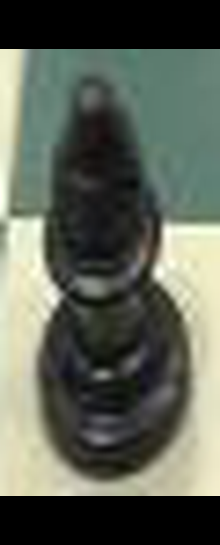

In [87]:
modify_image("../data/robo/train/f1ea0167087976926d4fe0aa36b961ce_jpg.rf.792c747c6116ade848581cd7c6be27e2.jpg", 220, 545, crop=(188, 225.5, 30, 61))

In [72]:
extract_images("train")

  0%|                                           | 1/606 [00:00<01:23,  7.23it/s]

Extracting {'image': '1877a28e4c5f5c1ea68aca66f4e85d95_jpg.rf.c65abe6a33f5679f8c1e84d9029a77e4.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 339.1618538510553, 'y': 120.94344960805809, 'width': 30.285433609163192, 'height': 68.01492441538241}}, {'label': 'black-king', 'coordinates': {'x': 340.78950014004454, 'y': 152.97835973791453, 'width': 31.454156384465023, 'height': 82.53237948031062}}, {'label': 'black-bishop', 'coordinates': {'x': 305.5328063653834, 'y': 260.3848875303551, 'width': 24.20398123487962, 'height': 60.9101940258131}}, {'label': 'black-bishop', 'coordinates': {'x': 326.0982058561459, 'y': 83.20780623152714, 'width': 22.686527154676014, 'height': 59.38401142842079}}, {'label': 'white-rook', 'coordinates': {'x': 360.93354961172554, 'y': 312.8623711663353, 'width': 32.70398123487962, 'height': 61.05856207770296}}, {'label': 'white-rook', 'coordinates': {'x': 321.76146090388374, 'y': 26.120530906886064, 'width': 21.971260165497938, 'height': 40.87528

  1%|▍                                          | 6/606 [00:00<00:38, 15.51it/s]

Extracting {'image': 'ef1d425fd5370fbf8b7adea43b755304_jpg.rf.c511c91a1669993209db75e7013631ba.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 340.56721233077565, 'y': 300.899454807588, 'width': 34.71672466607242, 'height': 59.576017142631144}}, {'label': 'black-king', 'coordinates': {'x': 331.078754753462, 'y': 197.6176431191907, 'width': 35.98779591439313, 'height': 86.0847446750953}}, {'label': 'black-pawn', 'coordinates': {'x': 215.68528320932154, 'y': 24.22097844304089, 'width': 20.294817756613952, 'height': 44.831646233636135}}, {'label': 'black-knight', 'coordinates': {'x': 177.69899034064485, 'y': 161.8144506506003, 'width': 29.702176151953154, 'height': 58.9887418179901}}, {'label': 'white-king', 'coordinates': {'x': 105.47541210891077, 'y': 153.57994285789607, 'width': 33.987795914393104, 'height': 86.04983454523887}}, {'label': 'white-queen', 'coordinates': {'x': 145.46471106902032, 'y': 118.89919532569559, 'width': 30.284116716723474, 'height': 78.9887418

  3%|█▏                                        | 17/606 [00:00<00:20, 29.11it/s]

Extracting {'image': 'IMG_0317_JPG.rf.c4575757a6e19ad9fb88d28b1a15193e.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 187.24692440322343, 'y': 41.31823997454662, 'width': 19.282164745831324, 'height': 48.72108501591261}}]}
Extracting {'image': '673bcd0d44f495fbe9dd88d5cacfceb3_jpg.rf.c3db2d6f80603a8fdd150776e4a74da0.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 216.75802577991783, 'y': 25.5, 'width': 23.98394844016434, 'height': 51}}]}
Extracting {'image': 'e79deba8fe520409790b601ad61da4ee_jpg.rf.c5ace9198f249698fecd9cd44699ad3e.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 200.1108721301503, 'y': 99.19514286641606, 'width': 18.238531022249163, 'height': 41.5237465082933}}]}
Extracting {'image': '446e75de1ffefc2115e79696bcf0e357_jpg.rf.c74c5023e09478494c8b41aa67f070fe.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 59.91406600780431, 'y': 328.32510889879313, 'width': 33.80834497998063, 'height': 53.3898

  3%|█▍                                        | 20/606 [00:00<00:21, 27.06it/s]

Extracting {'image': 'ce54969567273b9b8a275812ff56e16c_jpg.rf.c314f1d0e3f3e5009805961ff05a7934.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 160.96471106902032, 'y': 118.62864181930821, 'width': 34.71137414612724, 'height': 76.56728961016708}}, {'label': 'black-knight', 'coordinates': {'x': 226.14079628416783, 'y': 162.96788000158173, 'width': 32.24582169431096, 'height': 60.532379480310624}}, {'label': 'white-bishop', 'coordinates': {'x': 225.15300036977473, 'y': 248.44169740418943, 'width': 31.362209807265003, 'height': 64.51492441538244}}, {'label': 'white-queen', 'coordinates': {'x': 261.9647110690203, 'y': 116.86568026155823, 'width': 30.667728603769433, 'height': 74.9974693504542}}, {'label': 'white-knight', 'coordinates': {'x': 341.2111944262518, 'y': 244.41690987251616, 'width': 34.00769494845758, 'height': 69.55856207770296}}, {'label': 'white-king', 'coordinates': {'x': 301.5045091371493, 'y': 149.1587501319654, 'width': 35.929601857916055, 'height': 84.

  4%|█▌                                        | 23/606 [00:01<00:28, 20.13it/s]

Extracting {'image': 'ca869123d8a0cbcc6e54f4a445e5a78a_jpg.rf.cb3d9d5a5fd961cfb91b7cb00efeab83.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 341.5985561553166, 'y': 44.45118365757244, 'width': 26.12252886059605, 'height': 54.24197422008217}}, {'label': 'white-king', 'coordinates': {'x': 354.5164031826917, 'y': 137.85854205291167, 'width': 38.012336651810415, 'height': 88.07659004482508}}, {'label': 'white-bishop', 'coordinates': {'x': 346.80765481858947, 'y': 69.61121731288428, 'width': 25.7272533418178, 'height': 63.2274257059629}}, {'label': 'white-queen', 'coordinates': {'x': 277.31929087205856, 'y': 66.58897385030743, 'width': 30.919248224057696, 'height': 79.87291084715548}}, {'label': 'white-knight', 'coordinates': {'x': 322.59028603438753, 'y': 345.5001797198754, 'width': 37.78543360916319, 'height': 68.57659004482502}}, {'label': 'white-pawn', 'coordinates': {'x': 309.2145663908368, 'y': 76.52007875393994, 'width': 23.064348593250543, 'height': 49.154683135

  5%|██▏                                       | 31/606 [00:01<00:28, 20.13it/s]

Extracting {'image': '055b79dd8db4c43e1a23be6095aaf624_jpg.rf.cd15336671f029c9f3319e08f54705e5.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 218.23794702597792, 'y': 334.17353480310214, 'width': 28.12943358135692, 'height': 56.15417248999029}}]}
Extracting {'image': 'f9a9a175f26d4b26bca3a5338cc1405e_jpg.rf.d028744643f733777684eace4ef99cd6.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 331.64439977085163, 'y': 106.81068959657419, 'width': 36.541426785483054, 'height': 90.5329445024673}}, {'label': 'black-bishop', 'coordinates': {'x': 255.3658350859349, 'y': 47.05116077093992, 'width': 25.233071368552316, 'height': 63.712877191843646}}, {'label': 'black-rook', 'coordinates': {'x': 246.21491669000744, 'y': 21.110196210212894, 'width': 27.570166619985116, 'height': 42.22039242042579}}, {'label': 'black-rook', 'coordinates': {'x': 220.42948308084422, 'y': 85.55500824516872, 'width': 28.628346887330565, 'height': 54.81471679067846}}, {'label': 'blac

  6%|██▎                                       | 34/606 [00:01<00:37, 15.28it/s]

Extracting {'image': '0798bfb058da59d189c1bfadcf814f29_jpg.rf.d15086fbba4dea88618e8da79d0e52fc.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 123.1591922725159, 'y': 132.73886438599135, 'width': 32.57508699910869, 'height': 88.67453489432864}}]}
Extracting {'image': '1a8a4abcba7c4ead35c01f05b9fae8e5_jpg.rf.d4317263bf28a3b3e8a9e0f6618e9745.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 346.5633648565468, 'y': 347.72273064690955, 'width': 34.23127318019169, 'height': 60.06728961016711}}, {'label': 'black-rook', 'coordinates': {'x': 303.22892875167935, 'y': 31.806339738178146, 'width': 25.425754383687263, 'height': 49.41892155827722}}, {'label': 'black-queen', 'coordinates': {'x': 286.8934715441404, 'y': 180.59687895903954, 'width': 30.711374146127127, 'height': 76.4974693504542}}, {'label': 'black-king', 'coordinates': {'x': 317.89196849842403, 'y': 129.61180337442195, 'width': 37.51689294263156, 'height': 87.11092727248763}}, {'label': 'black-knig

  6%|██▍                                       | 36/606 [00:01<00:37, 15.19it/s]

Extracting {'image': '4de23afff63bc169b4ebe547a9c9b692_jpg.rf.d5caca6c6352c358873e2bcbe08dcb3e.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 304.3125520820415, 'y': 271.9500898535836, 'width': 33.24582169431096, 'height': 60.36653568427619}}, {'label': 'black-king', 'coordinates': {'x': 336.6409760040433, 'y': 163.3631697517361, 'width': 38.089635513227904, 'height': 89.41307989815249}}, {'label': 'black-queen', 'coordinates': {'x': 252.19532258629152, 'y': 129.89155928706754, 'width': 29.284116716723474, 'height': 78.81417344366531}}, {'label': 'black-rook', 'coordinates': {'x': 363.3401460645636, 'y': 325.11916292805597, 'width': 38.23127318019169, 'height': 59.92471595162158}}, {'label': 'black-rook', 'coordinates': {'x': 244.27107124832065, 'y': 29.333379019722116, 'width': 22.49849695428361, 'height': 51.74435712285077}}, {'label': 'black-pawn', 'coordinates': {'x': 278.7749187225495, 'y': 64.22318681093645, 'width': 20.853011813090916, 'height': 46.72690304

  6%|██▋                                       | 38/606 [00:02<00:43, 12.94it/s]

Extracting {'image': 'IMG_0291_JPG.rf.d2ba6353082aa25c15708824c08dfb27.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 335.47709487450265, 'y': 125.29508155616824, 'width': 39.97324740027386, 'height': 85.65456493480815}}, {'label': 'white-rook', 'coordinates': {'x': 188.81171069924557, 'y': 134.22918701172026, 'width': 28.187627637833884, 'height': 58.46255922059777}}, {'label': 'white-bishop', 'coordinates': {'x': 192.4755918287862, 'y': 174.2728246740408, 'width': 30.833112779026465, 'height': 63.50619688291829}}, {'label': 'white-king', 'coordinates': {'x': 73.6409760040433, 'y': 160.70439948004702, 'width': 38.69147511206273, 'height': 93.12838233741581}}, {'label': 'black-rook', 'coordinates': {'x': 116.1585306095954, 'y': 58.99860493428091, 'width': 27.18762763783394, 'height': 58.44510415566954}}, {'label': 'white-pawn', 'coordinates': {'x': 112.78261367100707, 'y': 131.90260207717571, 'width': 24.896657355448752, 'height': 48.4101940258131}}, {'label': 'whit

  7%|██▉                                       | 42/606 [00:02<00:42, 13.20it/s]

Extracting {'image': 'fa4e2b9a8cf58f405f69a56c662834f2_jpg.rf.d612185e16b2f1e8680764ed00dd4711.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 203.95954026895055, 'y': 215.10314802537982, 'width': 23.382108841329455, 'height': 48.26825692881846}}]}
Extracting {'image': '7ee8d13861bdc45e40a7cfe190a8d8a6_jpg.rf.d2b41f1d0bdb7f0bf1055dfa6902e7fd.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 267.701580371175, 'y': 48.364083590081684, 'width': 34.7412804051022, 'height': 78.87235371101072}}, {'label': 'white-bishop', 'coordinates': {'x': 338.1841199864291, 'y': 48.043741820511215, 'width': 29.59524616950489, 'height': 60.31999147039983}}, {'label': 'white-rook', 'coordinates': {'x': 333.05713922372286, 'y': 25.013231444946452, 'width': 29.86826116780844, 'height': 50.026462889892905}}, {'label': 'white-king', 'coordinates': {'x': 343.8269680457362, 'y': 115.45065339275854, 'width': 37.125408869511375, 'height': 89.89562581794888}}, {'label': 'white-kn

  8%|███▎                                      | 48/606 [00:02<00:36, 15.33it/s]

Extracting {'image': 'd67b5b9e900409b050dd9bd594f90709_jpg.rf.d4b4698f0544628c496bee35512f21e2.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 352.1043206079555, 'y': 17, 'width': 24.279721154911158, 'height': 33.5}}]}
Extracting {'image': '48d3c59a99b2b5a5b9f1eb7d5ba63b60_jpg.rf.d798956fd75f2a961a741523c14d932b.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 362.7453489432866, 'y': 297.89976343824515, 'width': 33.386885682428556, 'height': 66.69198838376155}}, {'label': 'black-pawn', 'coordinates': {'x': 222.09599419188078, 'y': 15.76267341239695, 'width': 23.189079468855994, 'height': 31.5253468247939}}, {'label': 'black-king', 'coordinates': {'x': 339.83485857787207, 'y': 141.52775569408612, 'width': 37.02360468298593, 'height': 90.21235078809991}}, {'label': 'black-queen', 'coordinates': {'x': 256.1370523642996, 'y': 108.0135444833009, 'width': 29.95379072525452, 'height': 78.1716259794232}}, {'label': 'black-pawn', 'coordinates': {'x': 300.9

  8%|███▌                                      | 51/606 [00:02<00:31, 17.89it/s]

Extracting {'image': 'a5c65b40e0be3480c0ecfacaab399a87_jpg.rf.d1364905ffdbf3466eff747cf5948b36.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 323.10803150157597, 'y': 122.14120337539977, 'width': 36.53144145675083, 'height': 87.19780621357248}}, {'label': 'black-bishop', 'coordinates': {'x': 251.42040386374208, 'y': 64.54845146216664, 'width': 25.716724666072423, 'height': 59.13962791546294}}, {'label': 'black-rook', 'coordinates': {'x': 238.46020193187104, 'y': 31.618265419898105, 'width': 24.056691010760574, 'height': 53.63090117074649}}, {'label': 'black-rook', 'coordinates': {'x': 211.49314643433834, 'y': 67.28116465460485, 'width': 26.04214249664136, 'height': 53.142536830368414}}, {'label': 'black-pawn', 'coordinates': {'x': 289.13177800986927, 'y': 140.3419185038777, 'width': 21.35301181309103, 'height': 46.616356596219134}}, {'label': 'black-pawn', 'coordinates': {'x': 318.00017971987546, 'y': 324.7051995033203, 'width': 27.4548514119258, 'height': 50.151263

 10%|████                                      | 58/606 [00:03<00:28, 18.98it/s]

Extracting {'image': '3474d785b1b21d68163f56aa00a92bc9_jpg.rf.dc30237c228a1ef77d0fa95a2836791e.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 59.167477664429526, 'y': 304.37414831212993, 'width': 33.66076181772647, 'height': 67.06728961016711}}, {'label': 'black-king', 'coordinates': {'x': 74.45662181957184, 'y': 201.63850493559903, 'width': 38.51859064875492, 'height': 87.64583740234406}}, {'label': 'black-queen', 'coordinates': {'x': 164.39666467614978, 'y': 117.59373168945177, 'width': 27.782947272223964, 'height': 73.96255922059777}}, {'label': 'black-pawn', 'coordinates': {'x': 131.35922389674755, 'y': 91.67847636454707, 'width': 21.311660519162103, 'height': 46.857828831028485}}, {'label': 'black-pawn', 'coordinates': {'x': 120.58500415698765, 'y': 164.8442994813651, 'width': 23.294205454233918, 'height': 45.89273896088491}}, {'label': 'black-pawn', 'coordinates': {'x': 151.8431638975384, 'y': 206.78573740366215, 'width': 24.30293298669801, 'height': 46.410194

 10%|████▏                                     | 60/606 [00:03<00:30, 17.89it/s]

Extracting {'image': 'b79ae5b70de58089ead6e32b235e30d3_jpg.rf.df8a88cab326fc33376d82c562d0b45f.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 98.886132036089, 'y': 121.76557519786658, 'width': 36.54822273528896, 'height': 88.80299641326673}}, {'label': 'black-bishop', 'coordinates': {'x': 169.00125416393337, 'y': 60.6013942254443, 'width': 22.384877872155585, 'height': 59.988780425466686}}, {'label': 'black-rook', 'coordinates': {'x': 179.2448082673778, 'y': 27.845366383533182, 'width': 27.2685015803778, 'height': 55.10515671724447}}, {'label': 'black-rook', 'coordinates': {'x': 203.73609702071127, 'y': 177.3565859580665, 'width': 31.024529422288936, 'height': 66.18662012148889}}, {'label': 'black-pawn', 'coordinates': {'x': 135.79344905731122, 'y': 138.41602826788878, 'width': 25.128850030244507, 'height': 49.05860620053335}}, {'label': 'black-pawn', 'coordinates': {'x': 114.05282133637805, 'y': 322.02118498513323, 'width': 26.698675805311154, 'height': 52.09351908

 11%|████▌                                     | 66/606 [00:03<00:31, 16.94it/s]

Extracting {'image': 'cae099fe41d6aa30033d71e433c33c8d_jpg.rf.e244d328c4a1dc04bdd511daa54a5bcb.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 275.0025083278668, 'y': 136.91439168087632, 'width': 29.478396960222312, 'height': 85.80016827655919}}, {'label': 'white-bishop', 'coordinates': {'x': 307.73609702071127, 'y': 190.83094807038958, 'width': 26.384877872155585, 'height': 60.2274257059629}}, {'label': 'white-pawn', 'coordinates': {'x': 317.08689811462244, 'y': 292.03462726805924, 'width': 24.16376291777783, 'height': 50.66923164948594}}, {'label': 'black-rook', 'coordinates': {'x': 205.3154701517334, 'y': 83.92124524653799, 'width': 22.687038176133342, 'height': 51.6255861071281}}, {'label': 'black-king', 'coordinates': {'x': 199.05073106315575, 'y': 222.6448234782721, 'width': 32.45512170186669, 'height': 84.88745936127475}}]}
Extracting {'image': '3914be0cea4aa8a6bbd1081ec3b034a7_jpg.rf.dc33766dd5985aee3962019edd74dd7a.jpg', 'annotations': [{'label': 'black-knig

 12%|████▊                                     | 70/606 [00:04<00:33, 16.13it/s]

Extracting {'image': '0cf670506bf9e0fe587647cd62caa232_jpg.rf.e44dd3107c47246d4ec175ac16e91830.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 228.49243047741226, 'y': 211.46788000158173, 'width': 27.942520330995876, 'height': 81.47128675306186}}]}
Extracting {'image': 'IMG_0291_JPG.rf.df9096730aa1a08ad2999bcd27d3ce48.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 86.09564769609364, 'y': 118.04142678548308, 'width': 40.516892942631614, 'height': 86.94217003182519}}, {'label': 'white-rook', 'coordinates': {'x': 235.26103187135072, 'y': 131.2810167791112, 'width': 28.716724666072423, 'height': 59.314173443665254}}, {'label': 'white-bishop', 'coordinates': {'x': 231.5826022276908, 'y': 171.75192664543852, 'width': 31.362209807265003, 'height': 64.343263577338}}, {'label': 'white-king', 'coordinates': {'x': 352.431766566553, 'y': 161.15407108846324, 'width': 39.235120654420484, 'height': 94.42471595162158}}, {'label': 'black-rook', 'coordinates': {'x'

 13%|█████▎                                    | 77/606 [00:04<00:30, 17.44it/s]

Extracting {'image': 'd079f4e77b2445abceca7534356db743_jpg.rf.e7fc6fdfea0d14dc4c82a6068b9e4159.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 188.3922598854088, 'y': 339.8684017100062, 'width': 23.55271253978151, 'height': 48.16923164948594}}]}
Extracting {'image': '9962a4d44388b9008aa0f466e4f4052c_jpg.rf.e631892cbc08c42fce1df2203b2a0320.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 266.3502368823911, 'y': 109.07773614257289, 'width': 32.89640519425734, 'height': 80.36653568427619}}, {'label': 'black-king', 'coordinates': {'x': 361.868827531146, 'y': 197.17152516866685, 'width': 39.62332103832421, 'height': 93.44217003182519}}, {'label': 'black-rook', 'coordinates': {'x': 377.8325223355705, 'y': 309.83442991723405, 'width': 37.66076181772655, 'height': 66.92471595162158}}, {'label': 'black-pawn', 'coordinates': {'x': 311.75790025865837, 'y': 161.59554052194716, 'width': 23.381480778875016, 'height': 50.761811203054435}}, {'label': 'black-pawn',

 13%|█████▍                                    | 79/606 [00:04<00:41, 12.73it/s]

Extracting {'image': '9d776e74e90c4f8092b060dd7567e2f8_jpg.rf.e56c4f14986b14ecae9d9693766bbb09.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 104.32083696124424, 'y': 242.7200341184007, 'width': 38.49003458940007, 'height': 85.92471595162158}}, {'label': 'black-rook', 'coordinates': {'x': 52.889408572377526, 'y': 304.80183679185495, 'width': 31.408153130511167, 'height': 60.84908160407258}}, {'label': 'white-rook', 'coordinates': {'x': 140.07561063922196, 'y': 295.78950014004454, 'width': 29.908153130511153, 'height': 60.831627523868974}}, {'label': 'white-knight', 'coordinates': {'x': 200.55735203659998, 'y': 38.15533522597944, 'width': 22.896515501333397, 'height': 60.25017514958532}}, {'label': 'black-queen', 'coordinates': {'x': 160.92808395171102, 'y': 108.59750525780467, 'width': 31.792194893377825, 'height': 77.34908160407252}}, {'label': 'black-pawn', 'coordinates': {'x': 127.0797911856666, 'y': 80.99894910248807, 'width': 20.535748996822264, 'height': 44.72

 14%|█████▋                                    | 82/606 [00:04<00:33, 15.60it/s]

Extracting {'image': '699edbacbfee5e6d4d6d2189bc88990a_jpg.rf.ecdf9c3d5f17c0c43930335adcd9ffef.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 184.69098829253505, 'y': 228.24664207664847, 'width': 23.84906978865729, 'height': 60.4101940258131}}]}
Extracting {'image': '998222d9c93f1640829d4f0032dbf3e8_jpg.rf.e6970890732ecad792fc36f8d5644d5f.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 143.32376334375547, 'y': 96.03971194705565, 'width': 23.79177683873337, 'height': 55.89273896088491}}]}
Extracting {'image': 'fc9d7bc0453cb3324406401c00224d30_jpg.rf.e9e48a12d9bcbcb2a03df0571e7617b6.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 238.28683480584579, 'y': 242.24029059196943, 'width': 26.651618994268745, 'height': 56.30253739019622}}]}
Extracting {'image': '8dd12470c30e3b265e8933a6fee7ad28_jpg.rf.e9434facbc330f439a3f33d614e18cb8.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 218.3599303952222, 'y': 23.863

 14%|██████                                    | 87/606 [00:05<00:34, 14.85it/s]

Extracting {'image': '889c420fb266b8d0e817306110042bda_jpg.rf.e94a6dd83fdb1bba12f4a84b1388fa86.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 234.72760364098843, 'y': 98.70584390630654, 'width': 24.62252886059605, 'height': 54.19832867772436}}, {'label': 'white-king', 'coordinates': {'x': 271.4897651432135, 'y': 163.15835088971994, 'width': 31.47742849140309, 'height': 84.88745936127475}}, {'label': 'white-pawn', 'coordinates': {'x': 240.1465015658755, 'y': 134.56035876511396, 'width': 22.535258459577904, 'height': 46.64013462124734}}, {'label': 'white-pawn', 'coordinates': {'x': 269.3668859834468, 'y': 66.68744791795848, 'width': 22.52944043284333, 'height': 46.14013462124734}}, {'label': 'white-pawn', 'coordinates': {'x': 304.43053397835615, 'y': 28.15450341549116, 'width': 22.011986352639724, 'height': 44.62558610712809}}, {'label': 'white-pawn', 'coordinates': {'x': 313.2580949713437, 'y': 270.9799212460601, 'width': 25.058530566516083, 'height': 48.712877191843

 15%|██████▍                                   | 93/606 [00:05<00:23, 22.26it/s]

Extracting {'image': '76e118acf05a8ebe06957f8882cc06aa_jpg.rf.ebc8f2857885aa9442f7817ea798f5ba.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 178.4239034052664, 'y': 324.4178836551623, 'width': 31.44348407268899, 'height': 83.6716259794232}}]}
Extracting {'image': 'a932287da44b9dfacd0d16a5c1d27923_jpg.rf.e6af160c98e230c8130c17ccd6787efa.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 70.42208662933393, 'y': 342.76037020843023, 'width': 30.391306835503542, 'height': 65.82926530479767}}]}
Extracting {'image': 'f2672cdc28767484b556da3ab6f1003e_jpg.rf.eb54d003a3fad58875432fdfef1764bc.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 323.73495537985934, 'y': 123.94717866362195, 'width': 34.97997095940377, 'height': 83.3029964132667}}, {'label': 'white-rook', 'coordinates': {'x': 179.67386816684433, 'y': 137.79881586682208, 'width': 25.837434129035387, 'height': 58.59351908806667}}, {'label': 'white-bishop', 'coordinates': {'x': 181.4

 16%|██████▋                                   | 96/606 [00:05<00:22, 22.34it/s]

Extracting {'image': 'a4028b2361ce7ead654a86b07ac39d52_jpg.rf.f18fa4c1dce2f0387c451354d1e535c0.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 267.6266588008724, 'y': 325.1359164099183, 'width': 30.840343043940948, 'height': 58.85489963080704}}, {'label': 'black-rook', 'coordinates': {'x': 353.10338748162854, 'y': 330.130798981525, 'width': 32.34616087375184, 'height': 59.872353711010646}}, {'label': 'black-king', 'coordinates': {'x': 300.44954835538044, 'y': 270.0140881476636, 'width': 38.50033336374213, 'height': 86.44217003182519}}, {'label': 'black-queen', 'coordinates': {'x': 247.2175018904265, 'y': 137.385741260333, 'width': 26.430519406010717, 'height': 74.30253739019622}}, {'label': 'black-pawn', 'coordinates': {'x': 282.8891278698497, 'y': 108.29882115848551, 'width': 21.282164745831324, 'height': 48.74435712285077}}, {'label': 'black-pawn', 'coordinates': {'x': 259.16480805838574, 'y': 232.53119192869656, 'width': 23.793800405453226, 'height': 50.7734472565

 16%|██████▊                                   | 99/606 [00:05<00:30, 16.57it/s]

Extracting {'image': '54a90aab8c73562975cc560d51a9d2d1_jpg.rf.f081bba0a3c5e5e14c0b6bd94992465f.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 198.05958146402799, 'y': 182.7030175347491, 'width': 28.413430197323123, 'height': 79.30016827655919}}, {'label': 'black-knight', 'coordinates': {'x': 166.6348655124064, 'y': 145.30100965935512, 'width': 23.71561728834871, 'height': 62.16923164948588}}, {'label': 'black-knight', 'coordinates': {'x': 149.2173687842019, 'y': 280.7481661228233, 'width': 29.76216150222507, 'height': 66.34381381891694}}, {'label': 'black-king', 'coordinates': {'x': 92.9719607638392, 'y': 129.1623780838242, 'width': 34.46579243793403, 'height': 83.97475044599025}}, {'label': 'black-rook', 'coordinates': {'x': 106.4130798981525, 'y': 38.58428499328269, 'width': 24.62252886059602, 'height': 54.198328677724376}}, {'label': 'black-rook', 'coordinates': {'x': 61.84571567153248, 'y': 332.1876276378339, 'width': 34.186527154676, 'height': 59.9747504459903

 17%|██████▊                                  | 101/606 [00:06<00:38, 13.23it/s]

Extracting {'image': '76d01bada90581f55f1ae64c062cafcf_jpg.rf.f3d7a25fb4f47eb56b7affa5673c14f7.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 104.33087027271134, 'y': 274.8515087673746, 'width': 31.082717568177827, 'height': 68.85836233303621}}, {'label': 'black-king', 'coordinates': {'x': 323.4792330695112, 'y': 137.32559755044434, 'width': 37.00167221857782, 'height': 87.01839598834806}}, {'label': 'black-rook', 'coordinates': {'x': 237.2913587840889, 'y': 40.88144717840902, 'width': 25.803414467911125, 'height': 56.71287719184363}}, {'label': 'black-bishop', 'coordinates': {'x': 211.25770006048896, 'y': 103.08127890184983, 'width': 25.943066018044533, 'height': 62.71287719184363}}, {'label': 'black-pawn', 'coordinates': {'x': 173.76891963502229, 'y': 81.00468885702475, 'width': 22.547386626000048, 'height': 45.62558610712807}}, {'label': 'black-pawn', 'coordinates': {'x': 288.40982534908903, 'y': 154.79265304797704, 'width': 20.617212401066695, 'height': 48.567

 18%|███████▏                                 | 107/606 [00:06<00:34, 14.46it/s]

Extracting {'image': '34ad1966ae7a17d4502ca141413ed8d2_jpg.rf.e8667dbbad2ad13b03ae4e809af01fda.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 191.21888937470936, 'y': 182.6432035578527, 'width': 27.653180089650164, 'height': 74.1483546601794}}]}
Extracting {'image': '0798bfb058da59d189c1bfadcf814f29_jpg.rf.f416b21fe1523c919632ecb16aace2e2.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 146, 'y': 130.30113619351363, 'width': 29, 'height': 86.33744555060343}}]}
Extracting {'image': 'b79ae5b70de58089ead6e32b235e30d3_jpg.rf.e843446cbb3275d85d46432364a2d867.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 328.65021779758615, 'y': 116, 'width': 38.09960705282856, 'height': 94.5}}, {'label': 'black-bishop', 'coordinates': {'x': 252.89492521960761, 'y': 52, 'width': 23.244707422021406, 'height': 64}}, {'label': 'black-rook', 'coordinates': {'x': 240.7265527434765, 'y': 23.5, 'width': 29.046894513046993, 'height': 47}}, {'label': 'black-

 18%|███████▌                                 | 111/606 [00:06<00:38, 13.02it/s]

Extracting {'image': 'f587402be410b424bcbbac06e1dc6162_jpg.rf.e827e0b68851bce5ae35b7bc5e7c0c4e.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 59.10920531143952, 'y': 326.06475896062125, 'width': 27.854887618468283, 'height': 61.48001428552607}}]}
Extracting {'image': 'IMG_0296_JPG.rf.e8332a65a587b3f337f25bca237988af.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 70.17386816684434, 'y': 143.6525433432445, 'width': 37.52942251279694, 'height': 91.86118455915556}}, {'label': 'white-rook', 'coordinates': {'x': 88.05202710455643, 'y': 79.05986036446674, 'width': 30.860705448279248, 'height': 62.709895379844454}}, {'label': 'white-king', 'coordinates': {'x': 303.4615173787445, 'y': 185.5873161692669, 'width': 45.03524034260795, 'height': 93.03574899682224}}, {'label': 'white-pawn', 'coordinates': {'x': 303.12150769854577, 'y': 158.07567854008914, 'width': 27.79380040545334, 'height': 51.14006960477781}}, {'label': 'white-pawn', 'coordinates': {'x': 2

 20%|████████                                 | 119/606 [00:07<00:23, 20.32it/s]

Extracting {'image': '66f3c2c7c10a9263de9c6e056ba5c1b9_jpg.rf.fd49e15d41262253b45c5bab05240902.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 254.36052704167315, 'y': 212.51554466575385, 'width': 37.48779591439313, 'height': 85.70362404338346}}, {'label': 'black-rook', 'coordinates': {'x': 342.55801433660156, 'y': 326.5478760934563, 'width': 37.26037020843023, 'height': 60.7065329582889}}, {'label': 'black-queen', 'coordinates': {'x': 242.7610318713507, 'y': 129.93409504840048, 'width': 27.885956315558303, 'height': 82.1483546601794}}, {'label': 'black-pawn', 'coordinates': {'x': 279.0902971761484, 'y': 101.64062800668941, 'width': 21.82391478485249, 'height': 45.61926551112458}}, {'label': 'black-pawn', 'coordinates': {'x': 207.51370713132332, 'y': 138.23047100501705, 'width': 23.38210884132951, 'height': 47.627992255841036}}, {'label': 'white-king', 'coordinates': {'x': 137.6553447982871, 'y': 167.32904074806112, 'width': 34.53144145675088, 'height': 87.1861705539

Extracting {'image': 'ef1d425fd5370fbf8b7adea43b755304_jpg.rf.f7787e4a869bce3acd75d98f934e857e.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 59.71269747196819, 'y': 301.20293033736766, 'width': 35.76037020843022, 'height': 60.89562581794894}}, {'label': 'black-king', 'coordinates': {'x': 75.31153097937013, 'y': 194.55747966900412, 'width': 37.06053848498942, 'height': 88.4014438446834}}, {'label': 'black-pawn', 'coordinates': {'x': 204.94715646346822, 'y': 17.865484786764245, 'width': 22.105687073063564, 'height': 35.73096957352849}}, {'label': 'black-knight', 'coordinates': {'x': 235.97541210891077, 'y': 152.70152914068512, 'width': 30.745821694310962, 'height': 60.337445550603434}}, {'label': 'white-king', 'coordinates': {'x': 310.75183387717664, 'y': 142.33464315723833, 'width': 35.060538484989365, 'height': 88.37817173774528}}, {'label': 'white-queen', 'coordinates': {'x': 271.7702298655247, 'y': 107.80008529600173, 'width': 30.85685928731982, 'height': 81.3316

 21%|████████▋                                | 129/606 [00:07<00:22, 21.03it/s]

Extracting {'image': 'IMG_0318_JPG.rf.f752cb565b0c634895506816ba026b7e.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 235.0214020797809, 'y': 70.75774467217306, 'width': 20.911205869567993, 'height': 48.726903042647166}}]}
Extracting {'image': '5a8433ec79c881f84ef19a07dc73665d_jpg.rf.ff374a0e164f5d51813ebbdb38ae9167.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 211.8651344875936, 'y': 144.22665636217445, 'width': 22.692345181410587, 'height': 59.88401142842082}}]}
Extracting {'image': 'c733616ab773817dd1a356dbbdf2ee33_jpg.rf.f0637765e389d17285e20d9e98d707bf.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 217.07086721832644, 'y': 128.7295904145998, 'width': 25.128346887330622, 'height': 54.71287719184363}}]}
Extracting {'image': 'c46bf04050a2a9323dfe563e8813602f_jpg.rf.ff5a4cfb28be5ab4636539e081efb107.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 189.58500415698768, 'y': 161.39882206408566, 'width': 27.

 22%|█████████▏                               | 135/606 [00:07<00:23, 19.70it/s]

Extracting {'image': 'e40003d4bbcdac7196b9502bfe2fb6ed_jpg.rf.fff02b8d5496821ff5b6def111287362.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 275.4774836359802, 'y': 52.80590332273626, 'width': 31.39640519425734, 'height': 80.34908160407254}}, {'label': 'white-king', 'coordinates': {'x': 356.72552077834774, 'y': 123.37501904520948, 'width': 36.59713844093187, 'height': 91.90726187141797}}, {'label': 'white-knight', 'coordinates': {'x': 231.87869064743683, 'y': 276.85861586251775, 'width': 30.77421973975993, 'height': 73.343263577338}}, {'label': 'black-rook', 'coordinates': {'x': 308.4451041556696, 'y': 23.789500140044556, 'width': 28.890208311339165, 'height': 47.57900028008911}}, {'label': 'white-rook', 'coordinates': {'x': 239.59094155801358, 'y': 59.72480124762331, 'width': 27.047303895693062, 'height': 60.30253739019621}}, {'label': 'white-bishop', 'coordinates': {'x': 235.21173194679204, 'y': 181.30043559517236, 'width': 27.195671947582923, 'height': 68.80253

 23%|█████████▌                               | 141/606 [00:08<00:25, 18.59it/s]

Extracting {'image': '389b4c47568c78c44df11dbb1377ffea_jpg.rf.0185f6bf38d82f7cbf9365edd7b2bfc7.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 234.82752583555566, 'y': 98.64735456895288, 'width': 20.803414467911125, 'height': 56.11344768131363}}]}
Extracting {'image': '104ec0199cb67e1a359b1b0845ee66f3_jpg.rf.04dc1a59935ead8705530bd4583a1222.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 246.23361760870407, 'y': 142.68407506048152, 'width': 23.18762763783394, 'height': 58.25017514958529}}]}
Extracting {'image': '675619f2c8078824cfd182cec2eeba95_jpg.rf.0130e3c26b1bf275bf240894ba73ed7c.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 215.57123952487984, 'y': 54, 'width': 24.26037020843023, 'height': 60.5}}]}
Extracting {'image': '239c409d5c09b493fed01a70a3cda4bc_jpg.rf.01a3333223abb899709f52303c100d19.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 241.4433089892394, 'y': 53.5, 'width': 24.571239524879843,

 24%|█████████▉                               | 146/606 [00:08<00:21, 21.28it/s]

Extracting {'image': '699edbacbfee5e6d4d6d2189bc88990a_jpg.rf.05759b66a63504389df87f76ea3e1bb3.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 181.72865453850034, 'y': 239.70836805469435, 'width': 25.221435315083227, 'height': 62.71287719184363}}]}
Extracting {'image': 'IMG_0317_JPG.rf.00207d2fe8c0a0f20715333d49d22b4f.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 228.5, 'y': 36.851329047499114, 'width': 18, 'height': 46.023746508293286}}]}
Extracting {'image': '614aadadb4a7f5b475b027b8e11398ee_jpg.rf.04c134d966574ad5fdcacfb8ab619fd6.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 337.40033090952227, 'y': 59.06119590071484, 'width': 28.00366623337254, 'height': 57.8141734436653}}, {'label': 'white-bishop', 'coordinates': {'x': 264.41918104016963, 'y': 173.38735569701987, 'width': 22.460028571051907, 'height': 55.25017514958529}}, {'label': 'white-knight', 'coordinates': {'x': 312.7921937684729, 'y': 323.2939169700966, 'width

 25%|██████████                               | 149/606 [00:08<00:20, 21.99it/s]

Extracting {'image': 'd494cb268ad7f9f55587de138edc1dc4_jpg.rf.0b7a384e3d2d7cd15c45edce54fd465a.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 40.90021009226638, 'y': 348.2850736607368, 'width': 29.571079939000057, 'height': 67.66289923470674}}]}
Extracting {'image': '5758322233deed7ae7adc23536db2a4f_jpg.rf.07a3d3e2244da0cdeddc6bf88e0d86a1.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 230.43824605950067, 'y': 190.5841581373396, 'width': 23.325798469413485, 'height': 56.80317769831015}}]}
Extracting {'image': '8f84f1945fd993facc3368d13345f333_jpg.rf.0b7d4817639d4820d53a3a92bff52578.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 156.89834012104063, 'y': 325.5746220769121, 'width': 32.26037020843023, 'height': 61.032379480310624}}, {'label': 'black-rook', 'coordinates': {'x': 71.42743714927916, 'y': 325.0822140255495, 'width': 33.70217615195318, 'height': 59.05856207770296}}, {'label': 'black-king', 'coordinates': {'x': 121.6

 25%|██████████▎                              | 152/606 [00:08<00:23, 19.11it/s]

Extracting {'image': '6bb6f7cb96bf37230681d12ff7882f61_jpg.rf.0735069f44fbf300bb0824ee46630bd4.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 156.09047689602386, 'y': 228.23958999362816, 'width': 27.158530609595402, 'height': 57.29671936346165}}]}
Extracting {'image': 'a9768de3fceeeae2618f362870fb9a88_jpg.rf.07e7239539431dfa4ad1282152ccad21.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 354.0615325830446, 'y': 178.5726187141796, 'width': 35.29219489337788, 'height': 77.38980779121437}}, {'label': 'black-king', 'coordinates': {'x': 343.0025083278668, 'y': 132.9562581794888, 'width': 34.86202066844453, 'height': 80.3839897644798}}, {'label': 'black-knight', 'coordinates': {'x': 340.8973516106223, 'y': 106.93880409928516, 'width': 30.74522632202229, 'height': 53.84326357733801}}, {'label': 'black-knight', 'coordinates': {'x': 365.958048084378, 'y': 238.69479727560503, 'width': 35.24522632202229, 'height': 53.895625817948826}}, {'label': 'black-bi

 26%|██████████▍                              | 155/606 [00:09<00:30, 14.94it/s]

Extracting {'image': '8ff64b3f770bfe96bdffc629efd16460_jpg.rf.09ed33a05bcda0d77e71b945d1e0475a.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 369.8224435645943, 'y': 330.62932571080967, 'width': 35.62834688733051, 'height': 54.203624043383456}}]}
Extracting {'image': '239c409d5c09b493fed01a70a3cda4bc_jpg.rf.0da84dd41081b1d68b3eed86259f4927.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 170.20822316126663, 'y': 58.49354363518932, 'width': 23.74522632202229, 'height': 53.8927389608849}}, {'label': 'black-knight', 'coordinates': {'x': 230.17122000051097, 'y': 168.5844851932029, 'width': 24.37324024297783, 'height': 59.401466493349005}}, {'label': 'black-bishop', 'coordinates': {'x': 114.98334571508866, 'y': 260.6120628563143, 'width': 27.815052097088937, 'height': 56.96255922059777}}, {'label': 'black-bishop', 'coordinates': {'x': 98.34703860211104, 'y': 94.25423402528587, 'width': 24.326689726266693, 'height': 57.401466493349005}}, {'label': 'b

 26%|██████████▊                              | 159/606 [00:09<00:39, 11.40it/s]

Extracting {'image': '6ba74e310dd824af891d057d674cedb9_jpg.rf.08dafde0b81de46e57122cc80a5cdc80.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 97.69061064849132, 'y': 124.94439725305376, 'width': 34.41386025918564, 'height': 81.19198838376153}}, {'label': 'black-queen', 'coordinates': {'x': 203.0982740247586, 'y': 176.33643403780894, 'width': 27.77421973975993, 'height': 73.15417248999029}}, {'label': 'black-bishop', 'coordinates': {'x': 146.0847446750953, 'y': 32.65350576250599, 'width': 23.50366623337254, 'height': 57.6309011707465}}, {'label': 'black-rook', 'coordinates': {'x': 111.60219974002351, 'y': 33.85422089098395, 'width': 22.84657064901856, 'height': 48.62799225584101}}, {'label': 'black-rook', 'coordinates': {'x': 69.21653376399127, 'y': 327.13056780700435, 'width': 33.99493870090839, 'height': 57.191988383761554}}, {'label': 'black-pawn', 'coordinates': {'x': 113.21653376399127, 'y': 326.8745832953223, 'width': 26.820388051626225, 'height': 47.1512635750

 27%|██████████▉                              | 161/606 [00:09<00:42, 10.47it/s]

Extracting {'image': '36066ba85572ce99198f1a21c2c8bbff_jpg.rf.0e1fe87ccd50187773a1725f684648e4.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 309.524529422289, 'y': 69.08390446847808, 'width': 21.756863951200103, 'height': 54.23853909611623}}, {'label': 'black-bishop', 'coordinates': {'x': 220.16543513635568, 'y': 138.52502360279138, 'width': 21.256863951200046, 'height': 54.23272106938168}}, {'label': 'black-queen', 'coordinates': {'x': 298.49170680797795, 'y': 174.92681774664544, 'width': 23.10599282653334, 'height': 69.25017514958529}}, {'label': 'black-knight', 'coordinates': {'x': 323.3744944069112, 'y': 127.22935513684163, 'width': 31.815470151733393, 'height': 78.34908160407252}}, {'label': 'black-rook', 'coordinates': {'x': 361.5877342239114, 'y': 330.11916292805597, 'width': 31.838327355444562, 'height': 57.85489963080704}}, {'label': 'black-rook', 'coordinates': {'x': 302.8146340424445, 'y': 38.51408814766357, 'width': 23.140487659422206, 'height': 49.25

 28%|███████████▎                             | 167/606 [00:10<00:31, 13.77it/s]

Extracting {'image': '04aed88a8d23cf27e47806eb23948495_jpg.rf.0afccd002b73949b13d75032bca2828b.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 203.01239376583663, 'y': 59.175201621812974, 'width': 25.442573506123722, 'height': 54.142536830368414}}, {'label': 'black-pawn', 'coordinates': {'x': 206.23424831081184, 'y': 129.1868372814349, 'width': 20.337843116554495, 'height': 48.11344768131363}}, {'label': 'black-king', 'coordinates': {'x': 216.5957433752128, 'y': 207.23919774973348, 'width': 34.55350077861135, 'height': 89.19198838376155}}, {'label': 'white-king', 'coordinates': {'x': 132.9898774018168, 'y': 114.76213570523515, 'width': 28.50986311629083, 'height': 86.65708140489579}}, {'label': 'white-bishop', 'coordinates': {'x': 100.93245090794056, 'y': 168.57014732147363, 'width': 29.608396622941825, 'height': 63.665808149612246}}, {'label': 'white-pawn', 'coordinates': {'x': 170.70806571341953, 'y': 127.48030432314599, 'width': 22.35529818148268, 'height': 49.125

 28%|███████████▋                             | 172/606 [00:10<00:29, 14.63it/s]

Extracting {'image': 'bc5decab88861286dcf78a367b4377cb_jpg.rf.118253b02b72c34a332d2bd78746c795.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 173.5694077204222, 'y': 22.54989495386681, 'width': 22.849546929977805, 'height': 37.01205568382224}}, {'label': 'black-rook', 'coordinates': {'x': 56.92432145991086, 'y': 305.4896165347556, 'width': 33.98961653475561, 'height': 64.75644589655553}}, {'label': 'black-king', 'coordinates': {'x': 82.17163805515544, 'y': 144.99003458940007, 'width': 35.05986036446674, 'height': 89.26808352573335}}, {'label': 'black-queen', 'coordinates': {'x': 167.40480869335545, 'y': 115.45679392044458, 'width': 30.350383039266717, 'height': 80.16334486313335}}, {'label': 'black-pawn', 'coordinates': {'x': 122.29923392146654, 'y': 161.9326825528001, 'width': 24.640487659422263, 'height': 49.54696857135559}}, {'label': 'black-pawn', 'coordinates': {'x': 134.11470407319993, 'y': 84.16543513635567, 'width': 21.559024255177803, 'height': 45.977142796

 29%|███████████▊                             | 174/606 [00:10<00:32, 13.39it/s]

Extracting {'image': 'a4ebf4c268d80c4fe329331ea981b3a1_jpg.rf.12e469ca411a793fab88746c49f8f790.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 186.03494196444203, 'y': 159.55011828087743, 'width': 29.04286501526724, 'height': 58.65708140489579}}, {'label': 'black-pawn', 'coordinates': {'x': 213.68095500508906, 'y': 20.73919774973349, 'width': 21.36191001017812, 'height': 39.11635659621911}}, {'label': 'black-rook', 'coordinates': {'x': 362.1682950797289, 'y': 307.5449671785508, 'width': 38.13016693899658, 'height': 61.209441873194464}}, {'label': 'black-king', 'coordinates': {'x': 343.414312359366, 'y': 199.95769973138647, 'width': 41.020646561036074, 'height': 86.72107753281631}}, {'label': 'black-queen', 'coordinates': {'x': 251.48096772205923, 'y': 115.43991287821144, 'width': 30.241280405102202, 'height': 78.65999031980127}}, {'label': 'black-pawn', 'coordinates': {'x': 295.6920854271549, 'y': 164.68717064517705, 'width': 23.088895011874456, 'height': 45.625083

 30%|████████████▏                            | 181/606 [00:11<00:24, 17.29it/s]

Extracting {'image': 'd079f4e77b2445abceca7534356db743_jpg.rf.15980e0041c274dd182fc8a6bdd25047.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 176.5742983325738, 'y': 331, 'width': 22.767620171303975, 'height': 46}}]}
Extracting {'image': 'd3a4e1b8f13ef89f419251f5c5839d0d_jpg.rf.0eac09b57ab66fc36635004e7f2124de.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 191.80380908863236, 'y': 335.74664207664847, 'width': 21.79420545423386, 'height': 45.86655636349258}}]}
Extracting {'image': 'd9acc69c5d57623cda22786e309201c9_jpg.rf.163bbc086efbf7cedbb02c4b36c83a28.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 264.9799212460601, 'y': 308.4059146317983, 'width': 38.589635513227904, 'height': 89.20944187319446}}, {'label': 'black-rook', 'coordinates': {'x': 342.0871113648401, 'y': 321.4550328214492, 'width': 37.30401575078804, 'height': 62.2065329582889}}, {'label': 'black-queen', 'coordinates': {'x': 241.60099821603887, 'y': 132.5717227814

 31%|████████████▊                            | 190/606 [00:11<00:19, 20.91it/s]

Extracting {'image': '675619f2c8078824cfd182cec2eeba95_jpg.rf.13e6aede17ac36e46af40237b2af1717.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 218.62585168787, 'y': 64.5, 'width': 21.977483635980207, 'height': 56}}]}
Extracting {'image': '00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.1a1407058a6170f001f2c269411d31d3.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 205.75435562333325, 'y': 76.20719968577323, 'width': 26.745644376666746, 'height': 75.14544574527389}}]}
Extracting {'image': 'fc9d7bc0453cb3324406401c00224d30_jpg.rf.172aecee627f7179de58fbbc01d619f8.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 231.89627915462927, 'y': 242.682110324624, 'width': 26.322889554508038, 'height': 55.802537390196164}}]}
Extracting {'image': '8dd12470c30e3b265e8933a6fee7ad28_jpg.rf.11ee9892a34c2b196cfa0cb55ecaaf73.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 189.04616831186632, 'y': 30.410661458377938, 'width': 21.9076

 32%|█████████████▏                           | 194/606 [00:11<00:21, 19.44it/s]

Extracting {'image': '9c153a9c9798dab948d4260eb109b315_jpg.rf.173225adc244d19c0342031fd17b26af.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 88.694913313511, 'y': 142.5352403426079, 'width': 26.76850158037783, 'height': 54.648354660179336}}]}
Extracting {'image': 'IMG_0166_JPG.rf.1b943996d63e88f793c9225b051e88aa.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 63.293133677968925, 'y': 119.637790192735, 'width': 32.42470157619974, 'height': 73.9311049036325}}, {'label': 'black-king', 'coordinates': {'x': 60.604054209112874, 'y': 152.2105327633313, 'width': 34.988697704120256, 'height': 85.00384747422879}}, {'label': 'black-rook', 'coordinates': {'x': 36.658656864832636, 'y': 315.37976441281717, 'width': 32.35488761846827, 'height': 61.93110490363256}}, {'label': 'black-rook', 'coordinates': {'x': 83.37491665906447, 'y': 20.456144111943242, 'width': 23.750166681871065, 'height': 40.912288223886485}}, {'label': 'black-bishop', 'coordinates': {'x':

 33%|█████████████▌                           | 201/606 [00:11<00:19, 20.83it/s]

Extracting {'image': '05de676d5078dc0a13796f3f627993ef_jpg.rf.1ae70c9f54b2825eb3a4d0c4e43d7213.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 257.1589902285748, 'y': 222.97841820034364, 'width': 27.36361436318475, 'height': 63.28561976243992}}]}
Extracting {'image': 'f9a9a175f26d4b26bca3a5338cc1405e_jpg.rf.1bfc00ef85611686b0566f4ea49a4c9f.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 81.57895507637767, 'y': 125.00839338097427, 'width': 37.04822273528896, 'height': 88.20362404338346}}, {'label': 'black-bishop', 'coordinates': {'x': 158.48710820688882, 'y': 64.06914723024714, 'width': 25.443066018044533, 'height': 62.13962791546294}}, {'label': 'black-rook', 'coordinates': {'x': 168.73191647426665, 'y': 32.01387784704307, 'width': 26.687038176133342, 'height': 51.148354660179365}}, {'label': 'black-rook', 'coordinates': {'x': 192.12592364773326, 'y': 100.86843210176919, 'width': 28.733588692844478, 'height': 53.15999031980127}}, {'label': 'black

 34%|█████████████▊                           | 204/606 [00:12<00:24, 16.59it/s]

Extracting {'image': '13106bbc80a01cc413c2ab5052d2ec25_jpg.rf.19c72bddcf32faef8dbe854f65ec3e6f.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 231.00066672748432, 'y': 177.35330942177796, 'width': 27.37234110790115, 'height': 64.62843197560005}}, {'label': 'white-rook', 'coordinates': {'x': 232.76213570523515, 'y': 136.39985993848907, 'width': 28.843251958846395, 'height': 59.663344863133375}}, {'label': 'white-queen', 'coordinates': {'x': 270.7763469160204, 'y': 53.795957385178, 'width': 29.956699640159968, 'height': 79.18662012148891}}, {'label': 'white-knight', 'coordinates': {'x': 225.5504516446196, 'y': 271.7136578716446, 'width': 33.37234110790109, 'height': 64.76808352573335}}, {'label': 'white-pawn', 'coordinates': {'x': 268.3293741118033, 'y': 234.71449398093355, 'width': 24.325798469413485, 'height': 56.55860620053335}}, {'label': 'white-pawn', 'coordinates': {'x': 301.8374341290354, 'y': 65.01749039420025, 'width': 21.76762017130386, 'height': 46.5004180

 35%|██████████████▌                          | 215/606 [00:12<00:15, 25.93it/s]

Extracting {'image': '00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.20e061b75dc554ebe40b33189e320831.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 200.71014956078483, 'y': 99.3565859580665, 'width': 26.37852203691591, 'height': 76.0935190880667}}]}
Extracting {'image': '9d776e74e90c4f8092b060dd7567e2f8_jpg.rf.23bd3ffda19846a2c63afa0af7313f1c.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 99.96187185926769, 'y': 242.6061254552884, 'width': 40.02064656103619, 'height': 87.145837402344}}, {'label': 'black-rook', 'coordinates': {'x': 46.796784150779324, 'y': 305.49633376662746, 'width': 32.14762732374248, 'height': 62.023651947846474}}, {'label': 'white-rook', 'coordinates': {'x': 135.07615030671332, 'y': 295.96028805294435, 'width': 31.13016693899658, 'height': 61.50619688291829}}, {'label': 'white-knight', 'coordinates': {'x': 199.15555037456772, 'y': 35.00025948189237, 'width': 24.13016693899658, 'height': 61.38401142842079}}, {'label': 'black-queen',

 37%|███████████████                          | 223/606 [00:12<00:16, 23.44it/s]

Extracting {'image': 'fa3cf2724c1648a8822b59ac0759475f_jpg.rf.2503a3b4a48386cdce9d069893234e2b.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 218.2801392095556, 'y': 56.26246906897731, 'width': 26.420208814333364, 'height': 82.64253683036841}}]}
Extracting {'image': '7df16cd59fb40e0691948cc805e4801b_jpg.rf.286df02ab2343ae37cddc443b06feccd.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 183.61668995996126, 'y': 106, 'width': 22.287982575642275, 'height': 49.5}}]}
Extracting {'image': '3057eba7e9b0221ddbdc96a01f39ab79_jpg.rf.2447ca37ec7de9b84cadcbbe539525e9.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 213.8425629789967, 'y': 56.5, 'width': 23.85524992997773, 'height': 73.5}}]}
Extracting {'image': '6ba74e310dd824af891d057d674cedb9_jpg.rf.2538782d08f7ce2bebeb479450f67a8b.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 90.40539220861389, 'y': 118.92366505410966, 'width': 34.931315324113854, 'height': 82.389807

 38%|███████████████▍                         | 229/606 [00:13<00:18, 20.64it/s]

Extracting {'image': 'f52e1873b8583f8bf4f7ddf6e9649f07_jpg.rf.2537eb51bebf5c74c4bd317859fdeae6.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 367.8364629897562, 'y': 342.83296054593364, 'width': 34.16508770848827, 'height': 62.744808267377834}}, {'label': 'black-king', 'coordinates': {'x': 318.65869416095745, 'y': 275.1342847406225, 'width': 42.86985425595367, 'height': 97.41937270504445}}, {'label': 'black-queen', 'coordinates': {'x': 268.49522073556454, 'y': 135.35414553106688, 'width': 33.7063596356104, 'height': 78.22153300902221}}, {'label': 'black-pawn', 'coordinates': {'x': 306.5253834355711, 'y': 106.71533009022248, 'width': 22.67619693560391, 'height': 48.48878042546667}}, {'label': 'black-pawn', 'coordinates': {'x': 276.6253664796109, 'y': 232.1218110021558, 'width': 24.315880013570904, 'height': 52.523693313000024}}, {'label': 'black-pawn', 'coordinates': {'x': 231.87299804234343, 'y': 138.00459860108907, 'width': 24.21111770509566, 'height': 49.523693313

 38%|███████████████▋                         | 232/606 [00:13<00:17, 21.92it/s]

Extracting {'image': 'IMG_0295_JPG.rf.282c3259eadee31b6cfd1548f0aa4e6d.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 325.16000042597767, 'y': 141.58884290710117, 'width': 42.21114954377788, 'height': 95.23271319243821}}, {'label': 'white-rook', 'coordinates': {'x': 308.23108036497774, 'y': 74.19647275860385, 'width': 30.94306601804442, 'height': 62.17162597942317}}, {'label': 'white-pawn', 'coordinates': {'x': 134.61135963604423, 'y': 252.18259491156078, 'width': 30.756863951200046, 'height': 54.1716259794232}}, {'label': 'white-king', 'coordinates': {'x': 50.775540608466514, 'y': 181.18001936039747, 'width': 43.76933768966674, 'height': 97.74143993715461}}, {'label': 'white-pawn', 'coordinates': {'x': 93.43888547159986, 'y': 152.43567050833732, 'width': 28.733588692844478, 'height': 53.159990319801295}}, {'label': 'black-rook', 'coordinates': {'x': 63.487108206888834, 'y': 64.6218410622879, 'width': 31.95470364722229, 'height': 62.67744380923415}}, {'label': 'blac

 39%|████████████████▏                        | 239/606 [00:13<00:16, 21.87it/s]

Extracting {'image': '76dbe2ccf986a2a0d399d3d8a47279ad_jpg.rf.26886d4d35f2aefff108d7aaf1cb37db.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 364, 'y': 323.0913182788198, 'width': 32.5, 'height': 60.94565341775183}}, {'label': 'black-king', 'coordinates': {'x': 349, 'y': 216.65486285524207, 'width': 40, 'height': 87.16388112954064}}, {'label': 'black-queen', 'coordinates': {'x': 257.5, 'y': 126.99248477141785, 'width': 27, 'height': 78.28561976243992}}, {'label': 'black-knight', 'coordinates': {'x': 187.5, 'y': 169.45569279472176, 'width': 29, 'height': 60.84381381891694}}, {'label': 'black-pawn', 'coordinates': {'x': 301.5, 'y': 177.77275401391256, 'width': 22, 'height': 47.6401346212474}}, {'label': 'black-pawn', 'coordinates': {'x': 292, 'y': 98.99633224564664, 'width': 20.5, 'height': 47.09648907888959}}, {'label': 'black-pawn', 'coordinates': {'x': 267.5, 'y': 220.283455053803, 'width': 23, 'height': 51.66923164948588}}, {'label': 'black-pawn', 'coordinates': {

 40%|████████████████▎                        | 242/606 [00:13<00:21, 16.57it/s]

Extracting {'image': '48d3c59a99b2b5a5b9f1eb7d5ba63b60_jpg.rf.303fc026ea7df3c5cafd1f551ed75390.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 359.2715291774359, 'y': 296.17909513788857, 'width': 33.38106785261766, 'height': 66.26808352573335}}, {'label': 'black-pawn', 'coordinates': {'x': 220.1163565962191, 'y': 17.5706449091388, 'width': 22.73271319243821, 'height': 35.1412898182776}}, {'label': 'black-king', 'coordinates': {'x': 336.36976555673783, 'y': 141.69115082171083, 'width': 37.020695768080486, 'height': 90.3495469299778}}, {'label': 'black-queen', 'coordinates': {'x': 253.67486825807083, 'y': 110.11135963604423, 'width': 29.447972895443513, 'height': 77.67498249231113}}, {'label': 'black-pawn', 'coordinates': {'x': 297.95994191880766, 'y': 158.08724826839975, 'width': 25.25016668187118, 'height': 43.581881458888915}}, {'label': 'black-pawn', 'coordinates': {'x': 287.523604682986, 'y': 83.32000085195531, 'width': 24.247257766965618, 'height': 43.05860620053

 41%|████████████████▋                        | 246/606 [00:14<00:24, 14.72it/s]

Extracting {'image': 'f3a5df526393445c6e2d38f66c1f5c27_jpg.rf.30434c68a81ca711cc012fba179621fb.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 370.5, 'y': 320.68884218970413, 'width': 28, 'height': 66.3258094971344}}]}
Extracting {'image': 'f2672cdc28767484b556da3ab6f1003e_jpg.rf.1e58ffa93dd27f57436a6b49d82d98e7.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 327.8408077274841, 'y': 130.11502314125045, 'width': 37.415053343796785, 'height': 83.20362404338346}}, {'label': 'white-rook', 'coordinates': {'x': 183.64632652398853, 'y': 141.45569954893352, 'width': 27.187627637833884, 'height': 58.148354660179336}}, {'label': 'white-bishop', 'coordinates': {'x': 187.2956591394099, 'y': 180.94115497440612, 'width': 29.92040386374208, 'height': 66.16289923470674}}, {'label': 'white-king', 'coordinates': {'x': 69.72441961453004, 'y': 127.61602323247695, 'width': 37.16237808382422, 'height': 91.70071512847795}}, {'label': 'white-pawn', 'coordinates': {'x': 

 41%|████████████████▊                        | 249/606 [00:14<00:25, 13.79it/s]

Extracting {'image': '93557fc861304f7753089c244bc1e33e_jpg.rf.2eb582969dccb15da9e2a7436c58e214.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 163.5571392237228, 'y': 29.871358180691793, 'width': 25.8857215525544, 'height': 54.41892155827722}}, {'label': 'black-rook', 'coordinates': {'x': 39.133289530436116, 'y': 326.381480778875, 'width': 35.68254809323423, 'height': 63.08474467509518}}, {'label': 'black-king', 'coordinates': {'x': 67.86029572708274, 'y': 162.782947272224, 'width': 38.62540886951143, 'height': 90.11965480495172}}, {'label': 'black-queen', 'coordinates': {'x': 155.5999830440398, 'y': 128.7928103885148, 'width': 33.706359635610454, 'height': 78.04110701277477}}, {'label': 'black-pawn', 'coordinates': {'x': 127.90475383049514, 'y': 62.269158440668285, 'width': 21.588895011874513, 'height': 45.84910129856435}}, {'label': 'black-pawn', 'coordinates': {'x': 121.0952249745546, 'y': 99.67315558356309, 'width': 22.176196935603883, 'height': 48.35782883102845

 41%|████████████████▉                        | 251/606 [00:14<00:31, 11.33it/s]

Extracting {'image': 'a4ebf4c268d80c4fe329331ea981b3a1_jpg.rf.31a38518592003e6e81426d0090bd58a.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 182.08500415698768, 'y': 170.22918701172026, 'width': 28.00366623337254, 'height': 57.97128675306186}}, {'label': 'black-pawn', 'coordinates': {'x': 216.52871324693814, 'y': 30.787749089423215, 'width': 20.276750389305676, 'height': 44.84037376610024}}, {'label': 'black-rook', 'coordinates': {'x': 348.0627472748602, 'y': 317.6703654521249, 'width': 36.54730389569306, 'height': 60.61965480495178}}, {'label': 'black-king', 'coordinates': {'x': 334.4129841572513, 'y': 211.39981194573755, 'width': 38.492408051362645, 'height': 86.14583740234406}}, {'label': 'black-queen', 'coordinates': {'x': 248.85302701382923, 'y': 127.38122129698262, 'width': 28.344039999472727, 'height': 77.47128675306189}}, {'label': 'black-pawn', 'coordinates': {'x': 289.5064563648107, 'y': 176.60560649150364, 'width': 21.785477921769825, 'height': 45.3665

 42%|█████████████████▎                       | 256/606 [00:15<00:30, 11.40it/s]

Extracting {'image': 'IMG_0295_JPG.rf.32f999d96696f80ebe62ade6437b2fe2.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 70.90586067473541, 'y': 138.68745623077785, 'width': 40.59378902609396, 'height': 94.91937270504445}}, {'label': 'white-rook', 'coordinates': {'x': 90.17965823042954, 'y': 72.61804851035564, 'width': 29.709799261614137, 'height': 61.67498249231113}}, {'label': 'white-pawn', 'coordinates': {'x': 255.64916690007425, 'y': 251.0166542849113, 'width': 29.616710833861475, 'height': 53.67498249231113}}, {'label': 'white-king', 'coordinates': {'x': 340.9695086696447, 'y': 182.48341361595584, 'width': 42.122879159766626, 'height': 97.45428559257783}}, {'label': 'white-pawn', 'coordinates': {'x': 299.7953181667791, 'y': 153.51749039420025, 'width': 27.605074780392442, 'height': 52.62843197560005}}, {'label': 'black-rook', 'coordinates': {'x': 332.30765481858947, 'y': 67.25066103240027, 'width': 30.721435315083227, 'height': 62.6982577506667}}, {'label': 'black

 44%|█████████████████▉                       | 265/606 [00:15<00:16, 20.36it/s]

Extracting {'image': '06770ce99d4866165c0dfb104179c361_jpg.rf.30f74da3f9fb816762fe128339f2b880.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 169.40300571689278, 'y': 274.5, 'width': 24.84906978865729, 'height': 60}}]}
Extracting {'image': '196829feb704a34a4e471155f14bdd80_jpg.rf.344f88ded341e5b5351c31ddc7e07fdb.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 209.83194966296662, 'y': 147.8645289963113, 'width': 19.255984511682072, 'height': 44.442229908755564}}]}
Extracting {'image': '3057eba7e9b0221ddbdc96a01f39ab79_jpg.rf.349a5aaf97f4108589df81010c7c4bde.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 215.27856468491677, 'y': 58.229705975505, 'width': 22.29706966263234, 'height': 68.87528389595667}}]}
Extracting {'image': 'f2672cdc28767484b556da3ab6f1003e_jpg.rf.3509d0a9193d954d2cef5fc1371760c4.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 90.86509618646846, 'y': 125, 'width': 38.98572579154444, 'height

 44%|██████████████████▏                      | 268/606 [00:15<00:19, 17.20it/s]

Extracting {'image': '0b4ba28f0c759a11750a6430649b52e3_jpg.rf.360b52c8b8fb20ebbe87ca4a63d454a4.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 213.91819732654577, 'y': 50, 'width': 23.814523742835945, 'height': 70}}]}
Extracting {'image': '8de03901c64a80070048ead3fb0d32bd_jpg.rf.3bdcf5223918218765c685e65d8efd1e.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 363.5528213363781, 'y': 314.1414579470883, 'width': 34.86160261379996, 'height': 59.47475044599025}}, {'label': 'black-king', 'coordinates': {'x': 324.73484285677785, 'y': 108.13075690719788, 'width': 34.03658510611126, 'height': 88.4311049036325}}, {'label': 'black-rook', 'coordinates': {'x': 307.1051567172444, 'y': 21.711825463348717, 'width': 24.710313434488853, 'height': 43.423650926697434}}, {'label': 'black-queen', 'coordinates': {'x': 218.48006917880014, 'y': 164.75868744283832, 'width': 27.268919635022257, 'height': 76.74197422008217}}, {'label': 'black-knight', 'coordinates': {'x': 27

 46%|██████████████████▋                      | 277/606 [00:16<00:13, 23.80it/s]

Extracting {'image': '6bb6f7cb96bf37230681d12ff7882f61_jpg.rf.391d72bf1073621fe3eac397ae4e34d9.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 264.9400682368014, 'y': 215.3307701317018, 'width': 27.186527154676014, 'height': 59.46255922059777}}]}
Extracting {'image': '614811e933a680fd6535ac8bf06bf530_jpg.rf.283f06fa4884ea55a91410d9ca4f937c.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 227.8319057155285, 'y': 176.12341531986647, 'width': 22.494938700908392, 'height': 57.500418054644456}}]}
Extracting {'image': '4667110b61b16e786673ed6126ccc35d_jpg.rf.3dc2ee18962afee7c0f61083d17ed411.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 216.5175546055521, 'y': 96.11320230164576, 'width': 21.64398209547619, 'height': 57.08194056477032}}]}
Extracting {'image': '446e75de1ffefc2115e79696bcf0e357_jpg.rf.378829d017d56bcfbe81248206ba928d.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 32.80149160240017, 'y': 349.248

 46%|██████████████████▉                      | 280/606 [00:16<00:18, 18.10it/s]

Extracting {'image': '00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.38c0bb7971151bf4cb185f5498fddcc0.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 203.45522675385274, 'y': 92.0782883102846, 'width': 26.3091298696163, 'height': 75.43637662320546}}]}
Extracting {'image': 'b7a8c7de4fe1382d69f58ac97e819b5c_jpg.rf.3c92a450faed773b5607e082e798c7fa.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 146.99453227243612, 'y': 46.76271463694258, 'width': 31.942520330995876, 'height': 81.902007875394}}, {'label': 'white-king', 'coordinates': {'x': 68.32686039464629, 'y': 158.9349523778613, 'width': 38.62287915976668, 'height': 97.59113855894435}}, {'label': 'white-rook', 'coordinates': {'x': 82.2618112030544, 'y': 24.885956315558307, 'width': 28.023622406108814, 'height': 45.800168276559184}}, {'label': 'white-bishop', 'coordinates': {'x': 77.4945322724361, 'y': 44.74047117436573, 'width': 28.77379755569413, 'height': 67.31471679067845}}, {'label': 'white-bishop', 

 47%|███████████████████▏                     | 283/606 [00:16<00:21, 15.10it/s]

Extracting {'image': 'd29148a2233950a7777285281cbfccff_jpg.rf.40093760ef1ab3612d0c64743229660a.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 80.84615824742933, 'y': 113.19616747744439, 'width': 30.065889004934633, 'height': 71.65170723395556}}, {'label': 'white-king', 'coordinates': {'x': 74.42274829225443, 'y': 150.37073191511107, 'width': 31.327762259081283, 'height': 80.67498249231113}}, {'label': 'white-knight', 'coordinates': {'x': 153.90050482967757, 'y': 78.97379835913321, 'width': 25.673079123714672, 'height': 58.05860620053335}}, {'label': 'white-knight', 'coordinates': {'x': 74.78880557374823, 'y': 248.92892006099993, 'width': 29.731273180191693, 'height': 60.15170723395556}}, {'label': 'white-rook', 'coordinates': {'x': 113.99098172570142, 'y': 306.55609787266656, 'width': 27.629433581356892, 'height': 56.60515671724443}}, {'label': 'white-rook', 'coordinates': {'x': 86.65468313536661, 'y': 21.632996626255526, 'width': 24.30936627073322, 'height': 43.26

 48%|███████████████████▌                     | 289/606 [00:17<00:20, 15.73it/s]

Extracting {'image': '389b4c47568c78c44df11dbb1377ffea_jpg.rf.4105215a89a9e91f39916aabf7bd3724.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 182.85049636428346, 'y': 91.27954052074386, 'width': 21.012393765836578, 'height': 58.349101298564335}}]}
Extracting {'image': '040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.41718e1241c9b432c1aef73937e12feb.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 317.2727466581822, 'y': 60.649930120116196, 'width': 26.564348593250543, 'height': 48.65126357508484}}, {'label': 'white-bishop', 'coordinates': {'x': 241.41132840229932, 'y': 178.08335844103237, 'width': 27.221435315083227, 'height': 62.154172489990344}}, {'label': 'white-king', 'coordinates': {'x': 365.55712936983355, 'y': 121.86485645937938, 'width': 35.05888086568666, 'height': 91.1978062135725}}, {'label': 'white-queen', 'coordinates': {'x': 285.8541990324658, 'y': 53.833191759161295, 'width': 28.919248224057583, 'height': 79.16289923470674}}, {'label': 'wh

 48%|███████████████████▋                     | 291/606 [00:17<00:20, 15.41it/s]

Extracting {'image': 'f3a5df526393445c6e2d38f66c1f5c27_jpg.rf.4318c9a5d50fd309db266f4e848a1202.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 51.44162622364752, 'y': 328.5, 'width': 27.804015750787983, 'height': 62}}]}
Extracting {'image': '2fe75c34fd54e960146fb8b0ad8b3fd6_jpg.rf.46b8727756f5cbdf9d26a07bf9ee78d7.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 188.64849123262542, 'y': 102.45721197508905, 'width': 25.556691010760574, 'height': 54.05860620053335}}]}
Extracting {'image': '0cf670506bf9e0fe587647cd62caa232_jpg.rf.45dd2d1228e8eeb0d736bc53b3246b7c.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 234.2246531752061, 'y': 205.07686480315536, 'width': 27.97997095940383, 'height': 83.1400696047778}}]}
Extracting {'image': '8d796de64b9eed1ffd5ebe550d4ca807_jpg.rf.47e02933a0e4907473f52cb156d27a03.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 86.35836233303623, 'y': 28.505117428393262, 'width': 26.5566

 49%|████████████████████                     | 297/606 [00:17<00:20, 14.81it/s]

Extracting {'image': '5758322233deed7ae7adc23536db2a4f_jpg.rf.469940331ca0c0fbabd2eaad8348ed71.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 174.02467330362072, 'y': 169.9966555628443, 'width': 24.674891101206867, 'height': 58.55860620053335}}]}
Extracting {'image': 'a9768de3fceeeae2618f362870fb9a88_jpg.rf.444b950f0b329aa6e7ed17a86383606d.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 87.84922888986775, 'y': 170.36350309832332, 'width': 34.56667655764346, 'height': 74.61746462373594}}, {'label': 'black-king', 'coordinates': {'x': 95.84763580172259, 'y': 127.69525040849493, 'width': 34.15397848137283, 'height': 77.10000423899004}}, {'label': 'black-knight', 'coordinates': {'x': 96.4746165644289, 'y': 102.74763156273254, 'width': 29.780959244079128, 'height': 51.97778154576892}}, {'label': 'black-knight', 'coordinates': {'x': 79.85717313564324, 'y': 227.51429540340584, 'width': 34.28095924407913, 'height': 52.13492500848179}}, {'label': 'black-

 50%|████████████████████▍                    | 302/606 [00:17<00:15, 19.41it/s]

Extracting {'image': '3796db002cba7265bd32b0161ddd9127_jpg.rf.41aa0068bba0c15b03cb7a681aa6533c.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 108.21235078809987, 'y': 35.87167438041682, 'width': 23.29089149054778, 'height': 50.13381008565197}}]}
Extracting {'image': 'e8480d7fb9881d8a0e88b7be4d103f6d_jpg.rf.45bdf3534f70d8ac1475f0521b4480b0.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 323.19832867772436, 'y': 29.629258439350174, 'width': 28.396657355448724, 'height': 48.471286753061875}}]}
Extracting {'image': '53de0674524ae6d77bdfff48136dec2a_jpg.rf.418e577139ae88cec5118571c10db894.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 254.2687268198083, 'y': 58.010635568395436, 'width': 24.333112779026465, 'height': 63.1309011707465}}, {'label': 'black-king', 'coordinates': {'x': 327.4792595831396, 'y': 119.07429833257379, 'width': 37.95869888615459, 'height': 84.7065329582889}}, {'label': 'black-knight', 'coordinates': {'x': 

 51%|█████████████████████                    | 312/606 [00:17<00:09, 32.03it/s]

Extracting {'image': 'IMG_0299_JPG.rf.4d6c7558e7fd08da45a6fabde3296e5b.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 329.77568018853606, 'y': 132.19247288651138, 'width': 36.00033336374213, 'height': 86.8262716716223}}, {'label': 'white-rook', 'coordinates': {'x': 313.63929455172075, 'y': 69.30843112364471, 'width': 27.322889554508038, 'height': 56.12843197560002}}, {'label': 'white-king', 'coordinates': {'x': 66.0371491662869, 'y': 167.05944230982226, 'width': 35.02651359789144, 'height': 91.30299641326667}}, {'label': 'white-pawn', 'coordinates': {'x': 147.6444456540474, 'y': 236.4680134949779, 'width': 27.29089149054778, 'height': 50.628431975599995}}, {'label': 'white-pawn', 'coordinates': {'x': 106.21459297552103, 'y': 137.49045264404452, 'width': 24.276346916020373, 'height': 48.05860620053335}}, {'label': 'black-pawn', 'coordinates': {'x': 144.458608463839, 'y': 182.38655009073346, 'width': 23.80252715016968, 'height': 52.54696857135559}}, {'label': 'black-p

 52%|█████████████████████▍                   | 316/606 [00:18<00:13, 22.03it/s]

Extracting {'image': '49d365236ee4fb6bd982b0f00bff007e_jpg.rf.526a1568df59ddce6050cf2bce92f260.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 322.58355367746674, 'y': 109.1382944604943, 'width': 34.00167221857782, 'height': 86.18617055395057}}, {'label': 'black-queen', 'coordinates': {'x': 293.3520552578446, 'y': 163.81573826972843, 'width': 32.35038303926672, 'height': 79.67744380923415}}, {'label': 'black-rook', 'coordinates': {'x': 360.1110094822669, 'y': 324.94921499163826, 'width': 36.3965155013334, 'height': 60.203624043383456}}, {'label': 'black-rook', 'coordinates': {'x': 303.00041805464446, 'y': 20.65932359231695, 'width': 28.00083610928891, 'height': 41.3186471846339}}, {'label': 'black-bishop', 'coordinates': {'x': 140.09728157986686, 'y': 218.21459297552104, 'width': 29.989616534755612, 'height': 64.16580814961219}}, {'label': 'black-bishop', 'coordinates': {'x': 266.023693313, 'y': 21.76186284273504, 'width': 24.547386626000048, 'height': 43.52372568547

 54%|██████████████████████                   | 326/606 [00:18<00:10, 27.15it/s]

Extracting {'image': '06770ce99d4866165c0dfb104179c361_jpg.rf.4e1731dc330bcc7c45afae38ba2a6b66.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 189.31759792018806, 'y': 276, 'width': 24.494938700908392, 'height': 57}}]}
Extracting {'image': 'cae099fe41d6aa30033d71e433c33c8d_jpg.rf.4a845b5a7d4639700ca427c1099a1acc.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 140.78320675411635, 'y': 127, 'width': 28.46622545397031, 'height': 84}}, {'label': 'white-bishop', 'coordinates': {'x': 108.87554337784906, 'y': 179, 'width': 25.52984883076482, 'height': 59}}, {'label': 'white-pawn', 'coordinates': {'x': 100.12130935256319, 'y': 279.5, 'width': 23.864025713946774, 'height': 49.5}}, {'label': 'black-rook', 'coordinates': {'x': 209.67341506545546, 'y': 76, 'width': 22.381480778875016, 'height': 50.5}}, {'label': 'black-king', 'coordinates': {'x': 216.26461610536143, 'y': 214, 'width': 31.44877038904201, 'height': 83}}]}
Extracting {'image': '8d796de64b9eed1f

 55%|██████████████████████▍                  | 331/606 [00:18<00:09, 30.16it/s]

Extracting {'image': '4d6b667ecbd41ebd603b38848366d9d0_jpg.rf.4e30bb8f1b1048c822c448c40663b90d.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 307.99080200582597, 'y': 16.63896118797861, 'width': 26.01839598834806, 'height': 33.27792237595722}}, {'label': 'black-rook', 'coordinates': {'x': 351.1744024495556, 'y': 318.4026723531506, 'width': 35.78946723666877, 'height': 61.69780621357245}}, {'label': 'black-king', 'coordinates': {'x': 323.4884575773136, 'y': 101.60047856672307, 'width': 35.060538484989365, 'height': 88.18907946885605}}, {'label': 'black-queen', 'coordinates': {'x': 293.5481546795071, 'y': 151.2662867163353, 'width': 31.667728603769547, 'height': 74.6716259794232}}, {'label': 'black-pawn', 'coordinates': {'x': 282.9065170125433, 'y': 121.83319175916128, 'width': 19.867560327210185, 'height': 47.10762985150268}}, {'label': 'black-pawn', 'coordinates': {'x': 304.1889509636749, 'y': 318.17611035426546, 'width': 26.440302897806532, 'height': 49.64544574527

 55%|██████████████████████▋                  | 335/606 [00:19<00:12, 20.97it/s]

Extracting {'image': '31419854b103ca6becc4cc394c449e95_jpg.rf.4fcab5207dfc54387d4589fbc69c7a47.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 194.72622863514295, 'y': 136.41246519346655, 'width': 25.921792661294262, 'height': 72.94510415566953}}]}
Extracting {'image': '4bf38c062fa7b5796d15ba90d6c3a456_jpg.rf.54d7350f0b18e8ec51cc8b9c351f6dce.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 228.88287584459408, 'y': 65.33810085651973, 'width': 21.35529818148268, 'height': 49.11926551112458}}]}
Extracting {'image': '4eb630d4dd38528dacf72355caf5c06d_jpg.rf.542d02f24b1238b2b8ddf7e63669c6f1.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 246.63929455172075, 'y': 62, 'width': 25.854887618468297, 'height': 61}}, {'label': 'white-knight', 'coordinates': {'x': 330.04230026861353, 'y': 336.5, 'width': 34.901430256955905, 'height': 69}}, {'label': 'white-king', 'coordinates': {'x': 361.50806001723214, 'y': 170.5, 'width': 37.54105817241884

 56%|██████████████████████▊                  | 338/606 [00:19<00:17, 15.34it/s]

Extracting {'image': 'beb11566e59775b61f0ca369952067cc_jpg.rf.56493b995a4c4ae16d241c7e1120a53e.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 116.58386857316094, 'y': 254.40796246975924, 'width': 26.073486493085397, 'height': 61.790901336727075}}, {'label': 'black-rook', 'coordinates': {'x': 171.51998571447402, 'y': 29.50140119668256, 'width': 23.811660519162103, 'height': 46.767629229788945}}, {'label': 'black-rook', 'coordinates': {'x': 62.211115326750075, 'y': 303.7854336091632, 'width': 28.477483635980178, 'height': 56.31999147039983}}, {'label': 'black-king', 'coordinates': {'x': 84.84683013091092, 'y': 153.0181546785449, 'width': 34.431315324113825, 'height': 82.3839897644798}}, {'label': 'black-queen', 'coordinates': {'x': 165.40539220861388, 'y': 121.94903895607169, 'width': 25.195671947582923, 'height': 68.77926528325804}}, {'label': 'black-bishop', 'coordinates': {'x': 192.89552909232307, 'y': 208.78648450667512, 'width': 22.9862111684443, 'height': 56.7

Extracting {'image': '61567b97353acc18ba9e8aac0f111326_jpg.rf.5765711e8acd7531ab0b7c5df47febf7.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 318.9441503720353, 'y': 89.52452804978087, 'width': 34.10953454729247, 'height': 73.05856207770296}}, {'label': 'black-king', 'coordinates': {'x': 101.93344933214487, 'y': 119.71932389542943, 'width': 35.92960185791608, 'height': 84.0847446750953}}, {'label': 'black-bishop', 'coordinates': {'x': 151.7565227342014, 'y': 28.635714804160855, 'width': 25.013045468402822, 'height': 52.41019402581311}}, {'label': 'black-rook', 'coordinates': {'x': 116.2274257059629, 'y': 27.01605999920913, 'width': 25.4548514119258, 'height': 50.418921558277226}}, {'label': 'black-pawn', 'coordinates': {'x': 140.5153898969152, 'y': 140.3826163627017, 'width': 22.780269242494683, 'height': 44.37528389595667}}, {'label': 'black-rook', 'coordinates': {'x': 74.13111634694877, 'y': 332.12585168787007, 'width': 36.23127318019169, 'height': 60.10219974002

 57%|███████████████████████▍                 | 347/606 [00:20<00:15, 17.16it/s]

Extracting {'image': '9a6b61a6d3b3e3ecddc201b097aa02d1_jpg.rf.56770b3733424cb8ed9bf50d15ff31ca.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 237.5112581820099, 'y': 34.925092720766784, 'width': 20.468756103516057, 'height': 56.06739205065105}}]}
Extracting {'image': 'fb586797e8ad818c7e3e3a6411f73d84_jpg.rf.57db9c805851d5fdc9e3a5f28e9717bb.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 102.72153300902224, 'y': 31.593418640717445, 'width': 23.826689726266693, 'height': 57.1309011707465}}]}
Extracting {'image': '0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.56da1174519560712119d3fc195068cb.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 191.70686500897793, 'y': 232.65266989178065, 'width': 21.30936627073322, 'height': 45.23272106938168}}]}
Extracting {'image': 'fa3cf2724c1648a8822b59ac0759475f_jpg.rf.577379a932d9dff33794eba38ee6340d.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 205.33092692552762, 'y': 62.29470

 58%|███████████████████████▋                 | 351/606 [00:20<00:13, 18.98it/s]

Extracting {'image': 'edd285915356686fb53fb52c1ded0e53_jpg.rf.575ba04e0fde0ae4a7556799951ffb28.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 236.32510889879308, 'y': 62.136850387987565, 'width': 21.698163208145047, 'height': 60.36655636349258}}]}
Extracting {'image': '47e842dd95735a11cf92c0ddf1161193_jpg.rf.550ba2f2bb261d19394fa2973ec4480a.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 73.68378016360512, 'y': 22.80174224933331, 'width': 27.367560327210242, 'height': 45.60348449866662}}]}
Extracting {'image': 'a4028b2361ce7ead654a86b07ac39d52_jpg.rf.55bd810c2826cd5fbda470f36df47735.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 267.1353855455888, 'y': 315.80458753430946, 'width': 30.840343043940948, 'height': 59.032379480310624}}, {'label': 'black-rook', 'coordinates': {'x': 352.612114226345, 'y': 318.3121794829469, 'width': 32.34616087375184, 'height': 60.05856207770296}}, {'label': 'black-king', 'coordinates': {'x': 299.

 58%|███████████████████████▉                 | 354/606 [00:20<00:19, 13.18it/s]

Extracting {'image': '8967433350d3b3043902603430fccaab_jpg.rf.58236ac06d7679220b6db7050d8b783d.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 79.45496727196037, 'y': 110.19616747744438, 'width': 33.44877038904207, 'height': 83.7448082673778}}, {'label': 'black-queen', 'coordinates': {'x': 70.24917272619427, 'y': 155.92892006099993, 'width': 33.791674804688114, 'height': 74.75644589655559}}, {'label': 'black-knight', 'coordinates': {'x': 60.79647662188732, 'y': 216.1733102737333, 'width': 31.460028571051964, 'height': 55.70989537984451}}, {'label': 'black-knight', 'coordinates': {'x': 80.03604571368315, 'y': 86.17289221908882, 'width': 28.925118441195536, 'height': 53.65170723395559}}, {'label': 'black-bishop', 'coordinates': {'x': 58.17795740076232, 'y': 266.7547736779777, 'width': 30.073486493085383, 'height': 62.174982492311074}}, {'label': 'black-bishop', 'coordinates': {'x': 90.32911558409033, 'y': 45.4168643771777, 'width': 23.064758960621276, 'height': 61.5120

 59%|████████████████████████▎                | 359/606 [00:20<00:14, 16.63it/s]

Extracting {'image': '4bf38c062fa7b5796d15ba90d6c3a456_jpg.rf.5dc82d8843d5593359743fb73bd57edd.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 177.7105327633313, 'y': 57.32209112517763, 'width': 21.940302897806532, 'height': 49.9771427962889}}]}
Extracting {'image': 'IMG_0167_JPG.rf.5ef94865f654a98f644c83ec15c0c7f0.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 89.77858910344153, 'y': 124.52651359789147, 'width': 31.401430256955905, 'height': 69.1803527241396}}, {'label': 'black-king', 'coordinates': {'x': 87.59823637930192, 'y': 155.51487793826954, 'width': 31.465426384876423, 'height': 80.18035272413965}}, {'label': 'black-rook', 'coordinates': {'x': 65.20810841822575, 'y': 308.389794597334, 'width': 31.822889554508038, 'height': 55.6832616390451}}, {'label': 'black-rook', 'coordinates': {'x': 108.84000968019873, 'y': 28.134143449394134, 'width': 18.767620171303946, 'height': 46.10762985150267}}, {'label': 'black-bishop', 'coordinates': {'x': 1

 60%|████████████████████████▍                | 362/606 [00:21<00:16, 15.02it/s]

Extracting {'image': 'IMG_0318_JPG.rf.60de6e8f2c9365770ed11379dfd1cb55.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 238.83197782303955, 'y': 64.5749072792332, 'width': 21.08762070018878, 'height': 51.09648907888959}}]}
Extracting {'image': '6589f4cfb37439d7d276f0d70f7ee1f0_jpg.rf.5e07c88452d0555565cf271ea458a66e.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 113.42064942074026, 'y': 248.42808395171102, 'width': 37.00070059834127, 'height': 86.83790930079999}}, {'label': 'black-rook', 'coordinates': {'x': 65.63044868235441, 'y': 310.5569339819555, 'width': 33.7272533418178, 'height': 63.268083525733346}}, {'label': 'black-knight', 'coordinates': {'x': 229.37922263525718, 'y': 156.20487872411093, 'width': 32.66907307447235, 'height': 58.24480826737778}}, {'label': 'black-queen', 'coordinates': {'x': 162.42541654996288, 'y': 118.75268340475543, 'width': 28.895976117119517, 'height': 77.65170723395556}}, {'label': 'black-pawn', 'coordinates': {'x':

 61%|████████████████████████▉                | 368/606 [00:21<00:14, 16.68it/s]

Extracting {'image': 'd9acc69c5d57623cda22786e309201c9_jpg.rf.5ee63a61ee05ff129fdbccefc3a0162e.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 279.68162363413484, 'y': 331.87742078942244, 'width': 39.62332103832421, 'height': 93.88445981751113}}, {'label': 'black-rook', 'coordinates': {'x': 361.42599454312983, 'y': 347.7743543454003, 'width': 38.63457922033422, 'height': 65.87282218833332}}, {'label': 'black-queen', 'coordinates': {'x': 246.46116415487867, 'y': 146.67916303875577, 'width': 32.92258779164973, 'height': 82.23317063820002}}, {'label': 'black-pawn', 'coordinates': {'x': 283.3938745447116, 'y': 115.05198522708913, 'width': 26.390208311339165, 'height': 51.5935190880667}}, {'label': 'black-pawn', 'coordinates': {'x': 211.54843947951977, 'y': 150.8645289963113, 'width': 23.85529818148268, 'height': 49.53533094217778}}, {'label': 'black-pawn', 'coordinates': {'x': 261.12812285552343, 'y': 242.481741397378, 'width': 28.460028571051907, 'height': 55.6400696047

 61%|█████████████████████████                | 371/606 [00:21<00:14, 16.17it/s]

Extracting {'image': '1595777dfa66e954ae23655743e24809_jpg.rf.5dc97daf85a90e102fd9454665288eb5.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 299.726584323167, 'y': 112.5, 'width': 41.20602362618206, 'height': 93}}, {'label': 'white-queen', 'coordinates': {'x': 322.9234099551749, 'y': 37, 'width': 38.153180089650164, 'height': 74}}, {'label': 'white-bishop', 'coordinates': {'x': 186.61169925592932, 'y': 168, 'width': 29.464049406099832, 'height': 67.5}}, {'label': 'white-rook', 'coordinates': {'x': 184.84832295606626, 'y': 125.5, 'width': 33.28946723666871, 'height': 61.5}}, {'label': 'black-rook', 'coordinates': {'x': 114.00535051994524, 'y': 17, 'width': 27.989298960109522, 'height': 34}}, {'label': 'white-king', 'coordinates': {'x': 63.813875407882506, 'y': 109.5, 'width': 40.278766196778264, 'height': 95.5}}, {'label': 'white-pawn', 'coordinates': {'x': 115.16153670102827, 'y': 46, 'width': 27.96939992604507, 'height': 50.5}}, {'label': 'white-pawn', 'coordinate

 62%|█████████████████████████▍               | 376/606 [00:21<00:13, 16.85it/s]

Extracting {'image': '04aed88a8d23cf27e47806eb23948495_jpg.rf.5b2ede62cd0912672150d67bc6ed8ead.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 210.890158090385, 'y': 72.83443636507431, 'width': 23.593438726923296, 'height': 51.401466493349005}}, {'label': 'black-pawn', 'coordinates': {'x': 213.65813761934456, 'y': 138.79952623521785, 'width': 19.023622406108814, 'height': 45.32291870117206}}, {'label': 'black-king', 'coordinates': {'x': 222.5133875493223, 'y': 212.15988571579214, 'width': 32.47742849140309, 'height': 84.54983454523881}}, {'label': 'white-king', 'coordinates': {'x': 144.50105089751193, 'y': 126.50392571526488, 'width': 26.448338357730393, 'height': 81.94510415566955}}, {'label': 'white-bishop', 'coordinates': {'x': 114.09448962443524, 'y': 178.04503272803964, 'width': 27.198163208145075, 'height': 60.46255922059777}}, {'label': 'white-pawn', 'coordinates': {'x': 180.14068353914092, 'y': 137.88427091031315, 'width': 20.541076486312477, 'height': 46.849

 63%|█████████████████████████▊               | 381/606 [00:22<00:13, 16.40it/s]

Extracting {'image': 'f3302c754c6fd42130014199ee327d10_jpg.rf.5a539486e56c8a43d6c4eb79bf8390cf.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 82.83710076529326, 'y': 28.965792437934027, 'width': 21.325798469413485, 'height': 56.24435712285077}}]}
Extracting {'image': 'a5c65b40e0be3480c0ecfacaab399a87_jpg.rf.647ac6c3b9611f89b1a7a757f7051b9f.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 344.1906106484913, 'y': 127.48969779534673, 'width': 38.132048570788356, 'height': 93.71235078809985}}, {'label': 'black-bishop', 'coordinates': {'x': 268.1083966229418, 'y': 65.05336055952507, 'width': 27.099669090477732, 'height': 63.15126357508484}}, {'label': 'black-rook', 'coordinates': {'x': 254.4974693504542, 'y': 29.977728771982658, 'width': 25.494938700908392, 'height': 57.14253683036841}}, {'label': 'black-rook', 'coordinates': {'x': 225.15203428526235, 'y': 67.303193877654, 'width': 26.994938700908392, 'height': 57.15126357508484}}, {'label': 'black-pa

 64%|██████████████████████████               | 385/606 [00:22<00:15, 14.60it/s]

Extracting {'image': '7df16cd59fb40e0691948cc805e4801b_jpg.rf.69645d63d7ad1dcadfcb6fef8d88cbae.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 237.14615126670483, 'y': 94.38060467694065, 'width': 22.58762070018878, 'height': 50.88401142842079}}]}
Extracting {'image': 'beb11566e59775b61f0ca369952067cc_jpg.rf.5d2e0331a1ac2070a72fc4c12a036f53.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 293.5010000912265, 'y': 254.60227238702726, 'width': 26.372341107901093, 'height': 64.30253739019622}}, {'label': 'black-rook', 'coordinates': {'x': 239.64253683036839, 'y': 23.17930793125889, 'width': 25.28507366073677, 'height': 46.35861586251778}}, {'label': 'black-rook', 'coordinates': {'x': 349.3006183264907, 'y': 305.456471419493, 'width': 28.837434129035387, 'height': 58.331627523868974}}, {'label': 'black-king', 'coordinates': {'x': 327.89012796107613, 'y': 149.1950105156093, 'width': 34.494515533931235, 'height': 85.39562581794888}}, {'label': 'black-quee

 64%|██████████████████████████▏              | 387/606 [00:22<00:17, 12.45it/s]

Extracting {'image': '49d365236ee4fb6bd982b0f00bff007e_jpg.rf.64f40e96e43baa404c6341ccd672ca08.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 331.4021444430247, 'y': 126.2601714263118, 'width': 32.48324651813766, 'height': 85.04983454523884}}, {'label': 'black-queen', 'coordinates': {'x': 302.5304913303553, 'y': 179.74524701092938, 'width': 30.913430197323123, 'height': 79.02365194784653}}, {'label': 'black-rook', 'coordinates': {'x': 366.3748058052052, 'y': 339.3274610364789, 'width': 34.686527154676014, 'height': 59.593472207559444}}, {'label': 'black-rook', 'coordinates': {'x': 313.31417344366525, 'y': 32.463435322532106, 'width': 25.605074780392442, 'height': 52.43637662320543}}, {'label': 'black-bishop', 'coordinates': {'x': 151.14138413748222, 'y': 229.59207714184032, 'width': 28.733071368552316, 'height': 63.4887418179901}}, {'label': 'black-bishop', 'coordinates': {'x': 277.3258094971344, 'y': 32.83505298511627, 'width': 23.645800967534115, 'height': 55.9014

 65%|██████████████████████████▍              | 391/606 [00:23<00:16, 13.40it/s]

Extracting {'image': 'a8847f8fe8eaaa1c97bf83027a901760_jpg.rf.6df2ccc6498e99df8337ffb8ab9c488a.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 225.204042614822, 'y': 277.23596203721644, 'width': 31.105992826533395, 'height': 69.85836233303621}}, {'label': 'white-king', 'coordinates': {'x': 352.13714322226656, 'y': 133.32944502467313, 'width': 35.54822273528896, 'height': 88.97475044599025}}, {'label': 'white-queen', 'coordinates': {'x': 276.70822316126663, 'y': 63.588973850307426, 'width': 28.28055726420007, 'height': 77.27107124832068}}, {'label': 'white-bishop', 'coordinates': {'x': 233.8453663835332, 'y': 185.42509272076677, 'width': 30.43142838886672, 'height': 62.34381381891694}}, {'label': 'white-rook', 'coordinates': {'x': 242.58020924031106, 'y': 68.09967489019789, 'width': 27.256863951200046, 'height': 54.75652273420141}}, {'label': 'white-pawn', 'coordinates': {'x': 233.904390638711, 'y': 139.8959956925283, 'width': 24.547386626000048, 'height': 45.683780

 66%|██████████████████████████▊              | 397/606 [00:23<00:11, 18.27it/s]

Extracting {'image': '06770ce99d4866165c0dfb104179c361_jpg.rf.6e91bc2ccd7b43b371771f4aa6565d58.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 230.94851090714968, 'y': 282.18517046272405, 'width': 24.50366623337254, 'height': 57.63671900055738}}]}
Extracting {'image': 'a8847f8fe8eaaa1c97bf83027a901760_jpg.rf.69b91785d4aea8f4199f9c847b918428.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 194.77268212682245, 'y': 271.69339607892243, 'width': 30.05944230982226, 'height': 67.33162752386897}}, {'label': 'white-king', 'coordinates': {'x': 71.44432018197789, 'y': 127.29706966263231, 'width': 33.99003458940007, 'height': 85.8723537110107}}, {'label': 'white-queen', 'coordinates': {'x': 144.91979075968894, 'y': 62.66977367281365, 'width': 27.734006747488934, 'height': 74.80253739019619}}, {'label': 'white-bishop', 'coordinates': {'x': 186.68954650400013, 'y': 182.12357975810795, 'width': 29.384877872155585, 'height': 59.825809497134344}}, {'label': 'wh

 66%|███████████████████████████              | 400/606 [00:23<00:11, 18.17it/s]

Extracting {'image': 'f3a5df526393445c6e2d38f66c1f5c27_jpg.rf.7313c3f78aaf7e508f685612f68538c7.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 39.4430924699085, 'y': 346.47055956715667, 'width': 29.669489350190574, 'height': 67.33162752386897}}]}
Extracting {'image': '99ee6574b2a7afc0bb06269bbcf49a4c_jpg.rf.72f0a52418f5c4883a0d240e47d10f63.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 225.2679795289596, 'y': 72.53228283954682, 'width': 22.151618994268745, 'height': 56.6255861071281}}]}
Extracting {'image': '6179b463c8f503445e213b706d2a4de5_jpg.rf.6dad401212f974d778d11ec908ef1845.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 224.29313499102207, 'y': 222.4333022474063, 'width': 24.52759398252209, 'height': 53.30317769831015}}]}
Extracting {'image': '76d01bada90581f55f1ae64c062cafcf_jpg.rf.7104e065b387e61376bafda059671616.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 105.5, 'y': 269.1584906500731, 'wid

 67%|███████████████████████████▍             | 405/606 [00:23<00:09, 20.40it/s]

Extracting {'image': '1728cd731489df8bb8e0396e178fe393_jpg.rf.72e14139be3f1f663f1512324adbe0cd.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 94.00835661137809, 'y': 117.73066231033326, 'width': 40.64782956970495, 'height': 91.88445981751113}}, {'label': 'white-rook', 'coordinates': {'x': 244.04280415956183, 'y': 130.227735927822, 'width': 30.789467236668713, 'height': 62.17498249231113}}, {'label': 'white-knight', 'coordinates': {'x': 278.8934715441404, 'y': 168.889826627022, 'width': 31.434952377861237, 'height': 67.18662012148889}}, {'label': 'white-bishop', 'coordinates': {'x': 238.80618045942492, 'y': 172.82083696124425, 'width': 28.536791976696122, 'height': 70.61679434642224}}, {'label': 'white-queen', 'coordinates': {'x': 285.05969710219347, 'y': 42.83163848113309, 'width': 32.82776225908128, 'height': 80.70989537984447}}, {'label': 'white-king', 'coordinates': {'x': 363.9938080972588, 'y': 111.94634255433303, 'width': 38.30786322501672, 'height': 97.3262716

 68%|███████████████████████████▋             | 410/606 [00:23<00:09, 20.66it/s]

Extracting {'image': 'b79ae5b70de58089ead6e32b235e30d3_jpg.rf.70249336c8f66aeb7cd2c808d7e0a255.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 87.59203753024076, 'y': 122.03560875874854, 'width': 36.553062838952144, 'height': 90.91307989815249}}, {'label': 'black-bishop', 'coordinates': {'x': 161.80765481858947, 'y': 61.390858688726254, 'width': 22.209799261614194, 'height': 61.25017514958532}}, {'label': 'black-rook', 'coordinates': {'x': 173.68000852960017, 'y': 29.52467330362073, 'width': 27.639982940799655, 'height': 55.31417344366528}}, {'label': 'black-rook', 'coordinates': {'x': 193.89387432209566, 'y': 183.28066647994058, 'width': 31.285433609163192, 'height': 67.85489963080704}}, {'label': 'black-pawn', 'coordinates': {'x': 124.88258856779723, 'y': 140.4719607638392, 'width': 25.081802673454263, 'height': 50.28508330999256}}, {'label': 'black-pawn', 'coordinates': {'x': 96.18919248887477, 'y': 328.66360534690847, 'width': 27.116710833861475, 'height': 53.308

 68%|████████████████████████████             | 415/606 [00:24<00:11, 16.93it/s]

Extracting {'image': '6bb6f7cb96bf37230681d12ff7882f61_jpg.rf.77cbc9c645b41068d312e144d05d3792.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 138.63505294904425, 'y': 234.6899720663463, 'width': 27.34996498462226, 'height': 58.75652273420144}}]}
Extracting {'image': '3474d785b1b21d68163f56aa00a92bc9_jpg.rf.6ae75801d3082ec64235d399987e2f2d.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 54.90154645925456, 'y': 303.5, 'width': 34.287310401709476, 'height': 65.5}}, {'label': 'black-king', 'coordinates': {'x': 71.92854417792108, 'y': 202.5, 'width': 39.50318617629031, 'height': 86}}, {'label': 'black-queen', 'coordinates': {'x': 162.27458689149853, 'y': 121, 'width': 29.031755788151713, 'height': 72.5}}, {'label': 'black-pawn', 'coordinates': {'x': 130.21744766777573, 'y': 94, 'width': 22.106355396620415, 'height': 46}}, {'label': 'black-pawn', 'coordinates': {'x': 118.685691879624, 'y': 166.5, 'width': 24.07143462712864, 'height': 45}}, {'label': '

 69%|████████████████████████████▍            | 420/606 [00:24<00:08, 21.96it/s]

Extracting {'image': '8ff64b3f770bfe96bdffc629efd16460_jpg.rf.7b4792b9f562b28d55342586be82fe91.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 351.9416262236475, 'y': 330.60314547666036, 'width': 36.57123952487984, 'height': 54.203624043383456}}]}
Extracting {'image': '3796db002cba7265bd32b0161ddd9127_jpg.rf.7b8109ee9b9e4dc55b72ec056ee8a747.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 306.1270891528445, 'y': 25.298196039971877, 'width': 24.99849695428361, 'height': 50.596392079943755}}]}
Extracting {'image': 'a932287da44b9dfacd0d16a5c1d27923_jpg.rf.76d1125d6c63d8f0206bfcbd6dc6df99.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 352.1350981841189, 'y': 342.2489132443019, 'width': 29.117124155405918, 'height': 64.4887418179901}}]}
Extracting {'image': 'f1ea0167087976926d4fe0aa36b961ce_jpg.rf.792c747c6116ade848581cd7c6be27e2.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 344.11118675438, 'y': 165.5, 'wid

 71%|████████████████████████████▉            | 428/606 [00:24<00:08, 21.30it/s]

Extracting {'image': '2ee0fd0963465ba29d8f27c6e605c55d_jpg.rf.744c9a5ed432b0fccbd744ba3fe4b247.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 235.3387192184888, 'y': 334.5, 'width': 25.029848830764877, 'height': 59}}]}
Extracting {'image': '3057eba7e9b0221ddbdc96a01f39ab79_jpg.rf.787d84dddfa8b765df03c4b1af8fa18c.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 202.24313604879995, 'y': 55.18392836652941, 'width': 24.69909385995561, 'height': 73.13381008565197}}]}
Extracting {'image': '4d6b667ecbd41ebd603b38848366d9d0_jpg.rf.7cc24cb0d6e9d83179bc05d30f21bb49.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 106.47634805215347, 'y': 31.86769194731928, 'width': 24.3989358438032, 'height': 51.91019402581311}}, {'label': 'black-rook', 'coordinates': {'x': 52.827103898329284, 'y': 326.0211212983007, 'width': 33.012393765836634, 'height': 58.55856207770296}}, {'label': 'black-king', 'coordinates': {'x': 88.39666467614978, 'y': 122.079683

 72%|█████████████████████████████▎           | 434/606 [00:25<00:08, 21.45it/s]

Extracting {'image': 'a20eb4bb3cea2e394cfcf9ed969b628e_jpg.rf.7e25c324029c6bddd1375645580f3009.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 149.08285357096617, 'y': 177.28950014004454, 'width': 25.151618994268745, 'height': 56.285083309992615}}]}
Extracting {'image': 'f1ea0167087976926d4fe0aa36b961ce_jpg.rf.7cfb591bdf3cb30001cfecb3b153724e.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 356, 'y': 161.71400311444546, 'width': 36, 'height': 95.62838233741581}}, {'label': 'black-king', 'coordinates': {'x': 96, 'y': 114.17568623310889, 'width': 37.5, 'height': 94.15456493480818}}, {'label': 'white-bishop', 'coordinates': {'x': 211, 'y': 27.18301869985391, 'width': 24.5, 'height': 47.427649090741326}}, {'label': 'bishop', 'coordinates': {'x': 197, 'y': 220.93864779085885, 'width': 29.5, 'height': 63.01492441538244}}, {'label': 'white-pawn', 'coordinates': {'x': 282, 'y': 223.92232830975735, 'width': 27.5, 'height': 54.480014285525954}}, {'label': '

 73%|█████████████████████████████▉           | 442/606 [00:25<00:06, 24.11it/s]

Extracting {'image': '8dd12470c30e3b265e8933a6fee7ad28_jpg.rf.83f5aa113ef37318fe16494fc6d836b0.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 205, 'y': 22.80249493573084, 'width': 21, 'height': 45.60498987146168}}]}
Extracting {'image': '1728cd731489df8bb8e0396e178fe393_jpg.rf.7ef76473b0a2962c632997f2fd7570eb.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 99.9719607638392, 'y': 125.35384873329517, 'width': 37.00651862507584, 'height': 86.91889792488706}}, {'label': 'white-rook', 'coordinates': {'x': 243.15231959261, 'y': 139.18989308721606, 'width': 28.18070912794144, 'height': 58.81999147039983}}, {'label': 'white-knight', 'coordinates': {'x': 278.0886715977007, 'y': 176.28844924253264, 'width': 28.733071368552373, 'height': 63.3258094971344}}, {'label': 'white-bishop', 'coordinates': {'x': 240.11776173137343, 'y': 179.23061927435785, 'width': 25.77379755569416, 'height': 66.79090133672713}}, {'label': 'white-queen', 'coordinates': {'x': 279.1

 74%|██████████████████████████████▏          | 446/606 [00:25<00:06, 23.45it/s]

Extracting {'image': '383c2ed7bbe2d327ab55a871db497c33_jpg.rf.86e4f3f7434d212f1874685d71056f1a.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 365.33407961806336, 'y': 329.5, 'width': 30.75634347549044, 'height': 65}}]}
Extracting {'image': '6589f4cfb37439d7d276f0d70f7ee1f0_jpg.rf.7cd0c647da853363af83fd4223c78dee.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 88.56771452579066, 'y': 248.80474959150507, 'width': 39.57633494589032, 'height': 93.84444962543228}}, {'label': 'black-rook', 'coordinates': {'x': 35.79973499683108, 'y': 316.6206296050759, 'width': 36.279615582428676, 'height': 68.23968731695709}}, {'label': 'black-knight', 'coordinates': {'x': 215.17895763208827, 'y': 148.92219302029076, 'width': 35.22143531508323, 'height': 63.20476654746528}}, {'label': 'black-queen', 'coordinates': {'x': 144.16767187778981, 'y': 109.4190280389507, 'width': 30.965792437934056, 'height': 84.04762308475244}}, {'label': 'black-pawn', 'coordinates': {'x': 

 74%|██████████████████████████████▍          | 449/606 [00:25<00:09, 16.26it/s]

Extracting {'image': 'IMG_0166_JPG.rf.866e83ca31acd30da2673fcb7e2abbfe.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 329.4545066836356, 'y': 119.27473870354464, 'width': 31.30870571610137, 'height': 70.03237948031062}}, {'label': 'black-king', 'coordinates': {'x': 332.8152243411772, 'y': 150.22237350875997, 'width': 33.93088427752673, 'height': 80.5760171426312}}, {'label': 'black-rook', 'coordinates': {'x': 356.1129946021508, 'y': 304.3470896128033, 'width': 31.174891101206867, 'height': 58.532379480310624}}, {'label': 'black-rook', 'coordinates': {'x': 309.80835541693074, 'y': 22.519831559463526, 'width': 22.55271253978151, 'height': 45.03966311892705}}, {'label': 'black-bishop', 'coordinates': {'x': 315.529790732014, 'y': 83.01038208007557, 'width': 20.6516189942688, 'height': 56.349101298564335}}, {'label': 'black-bishop', 'coordinates': {'x': 298.53700995543113, 'y': 255.8420283137117, 'width': 26.11671083386159, 'height': 53.44510415566958}}, {'label': 'blac

 75%|██████████████████████████████▊          | 455/606 [00:26<00:08, 18.13it/s]

Extracting {'image': '2c32afd520cc8bf076dfa5b6e2e1c4c1_jpg.rf.87c42395d755e8a3dd8c496a501efa69.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 240.3175604249557, 'y': 190.99296097191132, 'width': 21.02411136764448, 'height': 44.46550516711113}}]}
Extracting {'image': '2c32afd520cc8bf076dfa5b6e2e1c4c1_jpg.rf.85581a8cd489d624f76364df69817031.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 246.15063921954328, 'y': 172.0142530135053, 'width': 21.29420545423386, 'height': 46.21587577458081}}]}
Extracting {'image': 'd079f4e77b2445abceca7534356db743_jpg.rf.86f033e983acf1e547451e03dee0e582.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 220.0073932897478, 'y': 343.7915582180321, 'width': 22.773438001114926, 'height': 47.13090117074648}}]}
Extracting {'image': 'b3b002461f1c6b432e22964549767e5f_jpg.rf.89c6cd251768bebd0f1f27ffa57a4350.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 201.88287584459408, 'y': 56.911083793175

 76%|███████████████████████████████▎         | 463/606 [00:26<00:07, 20.41it/s]

Extracting {'image': '1877a28e4c5f5c1ea68aca66f4e85d95_jpg.rf.8214b540ec0fb6594f0a37059176df33.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 331.75170337574, 'y': 130.91697492270978, 'width': 30.178216882654624, 'height': 67.6687170645177}}, {'label': 'black-king', 'coordinates': {'x': 334.810265453443, 'y': 162.93151949723716, 'width': 31.922587791649676, 'height': 81.67744380923415}}, {'label': 'black-bishop', 'coordinates': {'x': 302.18668493322645, 'y': 270.2308043687592, 'width': 24.547303895693062, 'height': 60.13671900055749}}, {'label': 'black-bishop', 'coordinates': {'x': 317.5971384409319, 'y': 93.33843422026189, 'width': 23.029848830764877, 'height': 59.12799225584101}}, {'label': 'white-rook', 'coordinates': {'x': 359.0768932445655, 'y': 321.5566028381727, 'width': 32.54730389569306, 'height': 60.1832616390451}}, {'label': 'white-rook', 'coordinates': {'x': 311.51492441538244, 'y': 31.30934507120711, 'width': 21.890208311339165, 'height': 51.1221744260

 77%|███████████████████████████████▌         | 467/606 [00:26<00:06, 21.07it/s]

Extracting {'image': '389b4c47568c78c44df11dbb1377ffea_jpg.rf.8ecdacfacb51a1088354bbae4d6a0731.jpg', 'annotations': [{'label': 'black-bishop', 'coordinates': {'x': 232.71059636296533, 'y': 98, 'width': 20.4862111684443, 'height': 56.5}}]}
Extracting {'image': '6f0de9b594de9f9b92c6a20daa51a28a_jpg.rf.8f172ec0ccc12d54f9e13be42c61f072.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 225.51969567685404, 'y': 161.90952310397614, 'width': 23.357796533373744, 'height': 62.16923164948588}}]}
Extracting {'image': '03d3ff4582c8125d69c19a72f846bec8_jpg.rf.8cfdbdc73a4c6149758151715b2e8b44.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 334.5, 'y': 109.71442608006639, 'width': 29.5, 'height': 68.68662012148891}}, {'label': 'black-king', 'coordinates': {'x': 338, 'y': 140.13296267582194, 'width': 32.5, 'height': 79.25644589655559}}, {'label': 'black-bishop', 'coordinates': {'x': 347, 'y': 192.92348535062195, 'width': 26, 'height': 57.60515671724443}}, {'label'

 78%|████████████████████████████████▏        | 475/606 [00:26<00:04, 27.20it/s]

Extracting {'image': 'a20eb4bb3cea2e394cfcf9ed969b628e_jpg.rf.8e7941154e8218bc5c60a42ec75cfbf3.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 141.3207289735442, 'y': 173.73728536305742, 'width': 25.62943358135692, 'height': 56.69832867772436}}]}
Extracting {'image': '6179b463c8f503445e213b706d2a4de5_jpg.rf.8d422c23f907d10ba6ce02a34fc3e32e.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 193.47939582886437, 'y': 224.1824395750443, 'width': 24.315880013570904, 'height': 52.523693313000024}}]}
Extracting {'image': '239c409d5c09b493fed01a70a3cda4bc_jpg.rf.8f3596ebdf348f77b1bde7b51557bf0f.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 168.0643485932506, 'y': 49.474486493335014, 'width': 24.145800967534228, 'height': 55.63671900055745}}, {'label': 'black-knight', 'coordinates': {'x': 233.3675865817881, 'y': 161.84682760123616, 'width': 24.209799261614194, 'height': 61.136719000557434}}, {'label': 'black-bishop', 'coordinates': {'x

 80%|████████████████████████████████▊        | 485/606 [00:27<00:04, 28.39it/s]

Extracting {'image': '92992ff9c823e0420bf17e71db9ef4ef_jpg.rf.927b7a8d0224a92439c39e05b5b8f7f0.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 228.3408114831435, 'y': 275.5408475308824, 'width': 27.244707422021406, 'height': 64.46255922059777}}]}
Extracting {'image': '889c420fb266b8d0e817306110042bda_jpg.rf.8b7244d128b2eaa4e64c6bc4a1649911.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 242.4203166239963, 'y': 93.33919704645666, 'width': 26.4862111684443, 'height': 56.79671936346165}}, {'label': 'white-king', 'coordinates': {'x': 279.7071896114852, 'y': 163.28718510501642, 'width': 34.05350077861135, 'height': 89.37817173774522}}, {'label': 'white-pawn', 'coordinates': {'x': 246.74829662425992, 'y': 131.89737731380208, 'width': 24.35529818148268, 'height': 49.27344725652347}}, {'label': 'white-pawn', 'coordinates': {'x': 279.9876062341634, 'y': 61.269731024812785, 'width': 24.337843116554495, 'height': 48.2734472565235}}, {'label': 'white-pawn', 

 81%|█████████████████████████████████▏       | 491/606 [00:27<00:04, 25.84it/s]

Extracting {'image': '3914be0cea4aa8a6bbd1081ec3b034a7_jpg.rf.95fd9107c63ea71989cd7fddd5d9e033.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 159.293976373818, 'y': 88.28628142536041, 'width': 24.12943358135692, 'height': 56.65468313536661}}]}
Extracting {'image': '31419854b103ca6becc4cc394c449e95_jpg.rf.9640ba223176f79f1fc49b0258a4da86.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 187.7507753491223, 'y': 130.39882206408566, 'width': 28.619057711881055, 'height': 75.75652273420144}}]}
Extracting {'image': '79e744a68d6e6f83be0a9e8761ea66a4_jpg.rf.92eb07a6d24d7f998cedd49a676bb621.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 214.18100701409287, 'y': 153.92219302029076, 'width': 27.8091298696163, 'height': 75.9254003915313}}]}
Extracting {'image': '0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.91a1164b0c74bbe8ab32435e44b990a4.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 238.64720216421676, 'y': 234.366898664

 82%|█████████████████████████████████▌       | 496/606 [00:27<00:04, 25.29it/s]

Extracting {'image': '9fc54a45feb5b01db8f6828d181fb075_jpg.rf.95558424f2db7361bbdb93e8e51e0581.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 197.3403430439409, 'y': 55.061352209141134, 'width': 20.837434129035387, 'height': 58.357828831028456}}]}
Extracting {'image': 'fa4e2b9a8cf58f405f69a56c662834f2_jpg.rf.97f7416f560f73f366f58f69446c9287.jpg', 'annotations': [{'label': 'black-pawn', 'coordinates': {'x': 202.88144717840902, 'y': 242.2030175347491, 'width': 22.33846329897176, 'height': 46.61103759300886}}]}
Extracting {'image': 'IMG_0295_JPG.rf.939fab6c2495e85e1b177306373fbe6e.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 84.45094115542211, 'y': 131, 'width': 42.21114954377785, 'height': 95}}, {'label': 'white-rook', 'coordinates': {'x': 105.02202109442217, 'y': 63.5, 'width': 30.943066018044505, 'height': 62}}, {'label': 'white-pawn', 'coordinates': {'x': 270.4023003654887, 'y': 240.5, 'width': 30.756863951200103, 'height': 54}}, {'label': '

 83%|██████████████████████████████████▏      | 506/606 [00:28<00:03, 25.59it/s]

Extracting {'image': 'd33c33de41dbe1a95a43212c58fd12b7_jpg.rf.97eb2e7fe56237be37aa16911f677084.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 309, 'y': 33.5, 'width': 21.5, 'height': 53.5}}]}
Extracting {'image': '998222d9c93f1640829d4f0032dbf3e8_jpg.rf.96e7371e40c0f8f62167e9f459e7d457.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 152.0444581034124, 'y': 104.09207714184032, 'width': 23.3857215525544, 'height': 54.37528389595667}}]}
Extracting {'image': '6f0a888f9e5aed9516e336fd04723ce1_jpg.rf.96cb5b0fd28087f53914ec4b992a849c.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 350.06362337679457, 'y': 29.078436740914174, 'width': 23.872753246410866, 'height': 50.267629229788945}}]}
Extracting {'image': '61567b97353acc18ba9e8aac0f111326_jpg.rf.94cec1f562c9e5d3eb3b3544eecc72a0.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 103.06366276417835, 'y': 75, 'width': 32.42179266129426, 'height': 72.5}}, {'label': 

 84%|██████████████████████████████████▍      | 509/606 [00:28<00:05, 18.97it/s]

Extracting {'image': '3bab0eaaeb63a2ac9ae4942df4006a25_jpg.rf.8fd1c7b01ae630cdb96546469e0c742d.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 89.96032471037012, 'y': 126.01487793826954, 'width': 34.50651862507584, 'height': 86.694897298667}}, {'label': 'black-rook', 'coordinates': {'x': 76.11811203054404, 'y': 225.4276104911052, 'width': 31.174891101206924, 'height': 58.17744380923415}}, {'label': 'black-rook', 'coordinates': {'x': 103.8839897644798, 'y': 33.60214538543388, 'width': 23.63416491406511, 'height': 54.63381008565197}}, {'label': 'black-knight', 'coordinates': {'x': 164.1465015658755, 'y': 142.44539734428025, 'width': 25.709799261614194, 'height': 61.14544574527389}}, {'label': 'black-knight', 'coordinates': {'x': 147.24645891787463, 'y': 279.8377674927776, 'width': 31.267979528959586, 'height': 66.17744380923409}}, {'label': 'black-pawn', 'coordinates': {'x': 103.89225988540882, 'y': 335.08178298109556, 'width': 26.581802673454234, 'height': 50.15126357

 85%|██████████████████████████████████▊      | 514/606 [00:28<00:05, 17.42it/s]

Extracting {'image': 'c76c79e40bd9839a05237934cfa89ca3_jpg.rf.9a8aff67f0474c909c78cb647d887169.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 214.44013963553326, 'y': 94.7995066136387, 'width': 25.14090571406672, 'height': 71.18378016360509}}]}
Extracting {'image': '1a530d578f3f0bf3497bfeff3d953025_jpg.rf.a03681d6dbbeb2e50eac9e1feabbd309.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 350.96067500954075, 'y': 162.40818234005206, 'width': 32.489064544872235, 'height': 85.54983454523887}}, {'label': 'white-rook', 'coordinates': {'x': 334.93635200509067, 'y': 31.661280781511216, 'width': 24.610892807126902, 'height': 52.91892155827722}}, {'label': 'white-bishop', 'coordinates': {'x': 339.2272533418178, 'y': 56.591460521798346, 'width': 25.721435315083227, 'height': 62.43637662320545}}, {'label': 'white-bishop', 'coordinates': {'x': 359.72318681093645, 'y': 270.77726935309045, 'width': 31.692345181410587, 'height': 60.04110701277477}}, {'label': 'whi

 86%|███████████████████████████████████      | 519/606 [00:29<00:04, 17.62it/s]

Extracting {'image': '383c2ed7bbe2d327ab55a871db497c33_jpg.rf.9d983827ab445085bc8eef5da0b96932.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 33.543741820511215, 'y': 339.7818313820892, 'width': 31.27379755569413, 'height': 66.67744380923409}}]}
Extracting {'image': 'd0cc2420bce5b14dfd39e55dc3737e57_jpg.rf.a1e5deac03ed76b34211a0db4f49de60.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 349.8453168646334, 'y': 32.69850839759983, 'width': 26.30936627073322, 'height': 45.7274257059629}}]}
Extracting {'image': '614aadadb4a7f5b475b027b8e11398ee_jpg.rf.9c328189083b33832b90aa43f1de101d.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 339.71053276333123, 'y': 71.43663514345319, 'width': 29.202176151953154, 'height': 59.30016827655919}}, {'label': 'white-bishop', 'coordinates': {'x': 264.8789230300212, 'y': 183.8561976243993, 'width': 23.11488506723765, 'height': 56.12558610712807}}, {'label': 'white-knight', 'coordinates': {'x': 31

 86%|███████████████████████████████████▍     | 523/606 [00:29<00:05, 15.11it/s]

Extracting {'image': '37fe05bcf7d8568a9e55b569afdbccbd_jpg.rf.9f9e465232a4c7b586422397223786e9.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 231.74763156273252, 'y': 89.01151766390228, 'width': 25.920642322046092, 'height': 55.41892155827722}}]}
Extracting {'image': 'ce54969567273b9b8a275812ff56e16c_jpg.rf.9dcc1b3107606542dc0633cbc7ff5026.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 162.42541654996288, 'y': 123.4366705995638, 'width': 33.38434006365043, 'height': 76.18907946885605}}, {'label': 'black-knight', 'coordinates': {'x': 229.45485698280623, 'y': 169.32355628199235, 'width': 31.20398123487962, 'height': 60.67744380923409}}, {'label': 'white-bishop', 'coordinates': {'x': 232.4555575811475, 'y': 255.33519194161426, 'width': 30.244707422021406, 'height': 64.1716259794232}}, {'label': 'white-queen', 'coordinates': {'x': 263.92541654996285, 'y': 124.02718032537578, 'width': 29.366885983446764, 'height': 74.66580814961225}}, {'label': 'wh

 87%|███████████████████████████████████▋     | 528/606 [00:29<00:05, 14.50it/s]

Extracting {'image': '22e74efb18b2d88fba63d25a61bf5f97_jpg.rf.a3d860399c54e7d955b2235f44679f53.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 86.50105089751193, 'y': 129.4945155339312, 'width': 38.6286971865012, 'height': 97.2181686179108}}, {'label': 'black-rook', 'coordinates': {'x': 174.89562581794888, 'y': 35.01521130201171, 'width': 26.69234518141053, 'height': 59.65126357508484}}, {'label': 'black-bishop', 'coordinates': {'x': 202.65778732017392, 'y': 100.6722927069075, 'width': 31.314523742835945, 'height': 70.17744380923412}}, {'label': 'black-pawn', 'coordinates': {'x': 125.73377196689361, 'y': 149.72141089655847, 'width': 25.105074780392385, 'height': 52.142536830368385}}, {'label': 'black-pawn', 'coordinates': {'x': 160.2751987523767, 'y': 239.41630819522547, 'width': 27.13416491406508, 'height': 54.654172489990344}}, {'label': 'black-pawn', 'coordinates': {'x': 189.4093636664418, 'y': 294.0821163448377, 'width': 27.16907307447235, 'height': 57.6541724899

 88%|███████████████████████████████████▉     | 532/606 [00:30<00:05, 13.48it/s]

Extracting {'image': 'b3b002461f1c6b432e22964549767e5f_jpg.rf.a0d7beba87e87043554e0885b9b86897.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 205.30401575078798, 'y': 65.55210571289228, 'width': 25.673079123714672, 'height': 57.91892155827722}}, {'label': 'black-queen', 'coordinates': {'x': 246.12258001569523, 'y': 128.73285324509277, 'width': 29.342310773200552, 'height': 80.97128675306186}}, {'label': 'black-king', 'coordinates': {'x': 220.11037593008834, 'y': 213.73538389463857, 'width': 32.162378083824194, 'height': 92.01492441538244}}, {'label': 'black-pawn', 'coordinates': {'x': 210.3408077274841, 'y': 135.60447090767693, 'width': 22.80936627073322, 'height': 45.37528389595667}}, {'label': 'white-king', 'coordinates': {'x': 133.94799784626412, 'y': 120.7778859731324, 'width': 33.060538484989365, 'height': 88.53237948031065}}, {'label': 'white-bishop', 'coordinates': {'x': 103.07743142762104, 'y': 176.2105963629653, 'width': 29.362209807265003, 'height': 64.480

 88%|████████████████████████████████████▏    | 534/606 [00:30<00:05, 14.09it/s]

Extracting {'image': 'f041d3171dfe3137390c85fc5437e447_jpg.rf.a4744a0326d7d31d016563fd0ab94aea.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 80.5, 'y': 132.90513272672152, 'width': 40, 'height': 92.19820259712867}}, {'label': 'black-knight', 'coordinates': {'x': 133, 'y': 342.32152363545293, 'width': 37.5, 'height': 73.65456493480815}}, {'label': 'black-rook', 'coordinates': {'x': 127, 'y': 72.71679324588364, 'width': 27, 'height': 61.97128675306186}}, {'label': 'black-pawn', 'coordinates': {'x': 109.5, 'y': 240.41132960963984, 'width': 26.5, 'height': 51.96255922059777}}, {'label': 'black-pawn', 'coordinates': {'x': 191, 'y': 155.83391740128957, 'width': 23.5, 'height': 51.9101940258131}}, {'label': 'black-bishop', 'coordinates': {'x': 183.5, 'y': 240.70300441432795, 'width': 26.5, 'height': 66.96255922059777}}, {'label': 'black-bishop', 'coordinates': {'x': 265, 'y': 69.12559220597765, 'width': 31, 'height': 71.54110701277475}}, {'label': 'white-king', 'coordinat

 89%|████████████████████████████████████▌    | 541/606 [00:30<00:03, 16.92it/s]

Extracting {'image': 'de60ba81aa78387928e4bdc11f3be301_jpg.rf.a7cd83b2e02587367bb3305dbda0b78b.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 182.48226567457243, 'y': 224, 'width': 28.12408306141168, 'height': 73}}]}
Extracting {'image': '9fc54a45feb5b01db8f6828d181fb075_jpg.rf.9c25b91d55b315043a095051fe813a9c.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 214.63929455172075, 'y': 56.99581945355537, 'width': 20.331616299224493, 'height': 57.46550516711113}}]}
Extracting {'image': '4eb630d4dd38528dacf72355caf5c06d_jpg.rf.aa4d36c64699330596d6503653e43b00.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 227.45269610430694, 'y': 62.65883821768585, 'width': 27.073486493085397, 'height': 61.80253739019621}}, {'label': 'white-knight', 'coordinates': {'x': 307.6350981841189, 'y': 339.64790276255803, 'width': 35.71312701251111, 'height': 69.9014438446834}}, {'label': 'white-king', 'coordinates': {'x': 341.5500940271312, 'y': 173.008

 90%|████████████████████████████████████▋    | 543/606 [00:30<00:04, 13.92it/s]

Extracting {'image': 'ec5ab1930d6aa16fff2582b48f82cada_jpg.rf.aae26a4e7732a2ecb663aca13ca5e2be.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 359.62463065561985, 'y': 305.28599688555454, 'width': 33.686527154676014, 'height': 59.576017142631144}}, {'label': 'black-king', 'coordinates': {'x': 343.3912089878969, 'y': 199.5478228594778, 'width': 40.52979073201402, 'height': 89.18947506466458}}, {'label': 'black-queen', 'coordinates': {'x': 253.91959852322833, 'y': 117.59259610562506, 'width': 28.384340063650484, 'height': 76.48001428552595}}, {'label': 'white-knight', 'coordinates': {'x': 213.13416491406514, 'y': 50.79079870275376, 'width': 29.15743702100326, 'height': 56.997469350454196}}, {'label': 'black-pawn', 'coordinates': {'x': 219.77926528325804, 'y': 20.923763831885235, 'width': 21.000350299170634, 'height': 41.84752766377047}}, {'label': 'black-pawn', 'coordinates': {'x': 296.48394711647893, 'y': 165.3594833786399, 'width': 23.57598464671969, 'height': 49.901

 91%|█████████████████████████████████████▎   | 551/606 [00:31<00:03, 17.37it/s]

Extracting {'image': 'ec4c30d88ecc70b6a3e76dbd9b17324a_jpg.rf.aaf770cf8e03c34de0727104563ac2ee.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 114.01404831344809, 'y': 261.13811118477213, 'width': 32.04730389569306, 'height': 61.08254385424425}}, {'label': 'black-rook', 'coordinates': {'x': 60.15875013196542, 'y': 308.2873104017095, 'width': 33.00366623337251, 'height': 58.61746462373594}}, {'label': 'black-king', 'coordinates': {'x': 84.31192000105449, 'y': 157.03810694578203, 'width': 33.4749529864344, 'height': 85.61746462373594}}, {'label': 'black-queen', 'coordinates': {'x': 164.35302701382923, 'y': 128.81430812037598, 'width': 27.82658493454454, 'height': 76.9254003915313}}, {'label': 'black-rook', 'coordinates': {'x': 170.03744077940223, 'y': 32.45399119834299, 'width': 22.35529818148268, 'height': 49.750796544072585}}, {'label': 'white-knight', 'coordinates': {'x': 169.03997142894804, 'y': 60.936530813597116, 'width': 23.460028571051964, 'height': 55.785717

 92%|█████████████████████████████████████▊   | 559/606 [00:31<00:02, 20.96it/s]

Extracting {'image': 'IMG_0299_JPG.rf.ae4ab20b4db16431416f89b8d9582906.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 86.71585457963056, 'y': 134.3376219161758, 'width': 40.12540886951143, 'height': 90.57659004482508}}, {'label': 'white-rook', 'coordinates': {'x': 105.98570459659416, 'y': 68.84297243612102, 'width': 30.025404630521365, 'height': 58.81471679067846}}, {'label': 'white-king', 'coordinates': {'x': 359.2317218762313, 'y': 168.86503617882244, 'width': 39.28255233222433, 'height': 95.04749301658654}}, {'label': 'white-pawn', 'coordinates': {'x': 271.7872680118089, 'y': 241.3382835790963, 'width': 30.33334039831675, 'height': 53.32926530479767}}, {'label': 'white-pawn', 'coordinates': {'x': 318.8317261152214, 'y': 138.57256285072083, 'width': 26.72857808984145, 'height': 50.2274257059629}}, {'label': 'black-pawn', 'coordinates': {'x': 277.22537071860097, 'y': 185.73644398026147, 'width': 26.40318193730036, 'height': 55.21287719184363}}, {'label': 'black-paw

 93%|██████████████████████████████████████   | 562/606 [00:31<00:02, 18.58it/s]

Extracting {'image': 'IMG_0297_JPG.rf.a66ff62117c20eb55204281f042b32c7.jpg', 'annotations': [{'label': 'white-pawn', 'coordinates': {'x': 290.2369331300002, 'y': 229.97469350454202, 'width': 30.74522632202229, 'height': 54.01492441538244}}, {'label': 'black-king', 'coordinates': {'x': 100.10682893582232, 'y': 113.70186883050121, 'width': 41.280975318844526, 'height': 98.68074753220048}}, {'label': 'white-rook', 'coordinates': {'x': 117.09393714271116, 'y': 49.02478753167324, 'width': 30.95470364722229, 'height': 63.01492441538241}}, {'label': 'white-king', 'coordinates': {'x': 336.03783927004457, 'y': 157.80380908863236, 'width': 43.094773252000095, 'height': 90.71565766205691}}, {'label': 'white-pawn', 'coordinates': {'x': 333.386132036089, 'y': 129.76889895877594, 'width': 30.198675805311154, 'height': 52.00619688291829}}, {'label': 'black-pawn', 'coordinates': {'x': 183.89776966526676, 'y': 127.65936675200739, 'width': 28.45470364722229, 'height': 62.97128675306189}}, {'label': 'bla

 93%|██████████████████████████████████████▏  | 564/606 [00:31<00:02, 16.29it/s]

Extracting {'image': '0d9dbf62d5ee42b92bf55197bba4254d_jpg.rf.b159d61997f9dc9fdf926f76aa9c273f.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 56.590286034387546, 'y': 335.2960187651204, 'width': 33.1458009675342, 'height': 55.87817173774522}}]}
Extracting {'image': '7ee8d13861bdc45e40a7cfe190a8d8a6_jpg.rf.a866a35bb9ecd0567a6123b53152565f.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 144.85779653337374, 'y': 61.5, 'width': 31.439246150727172, 'height': 75.5}}, {'label': 'white-bishop', 'coordinates': {'x': 77.36070544827923, 'y': 62, 'width': 26.83452521412994, 'height': 57.5}}, {'label': 'white-rook', 'coordinates': {'x': 82.71525970300534, 'y': 37, 'width': 26.80834497998063, 'height': 53}}, {'label': 'white-king', 'coordinates': {'x': 69.73886438599133, 'y': 127, 'width': 33.00033336374216, 'height': 86}}, {'label': 'white-knight', 'coordinates': {'x': 100.42279275252073, 'y': 330.5, 'width': 36.40433917186141, 'height': 69.5}}, {'label': '

 94%|██████████████████████████████████████▋  | 572/606 [00:32<00:01, 22.76it/s]

Extracting {'image': '13106bbc80a01cc413c2ab5052d2ec25_jpg.rf.b232d48e25d062c5d25a5be4e1f81021.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 187.47608857026108, 'y': 170.5, 'width': 28.125851687870068, 'height': 64.5}}, {'label': 'white-rook', 'coordinates': {'x': 184.75170337574008, 'y': 129, 'width': 30.038576363228913, 'height': 59.5}}, {'label': 'white-queen', 'coordinates': {'x': 144.78547792176977, 'y': 45, 'width': 31.378950129329155, 'height': 79}}, {'label': 'white-knight', 'coordinates': {'x': 195.62559220597768, 'y': 265, 'width': 34.12585168787007, 'height': 64.5}}, {'label': 'white-pawn', 'coordinates': {'x': 151.46229973870538, 'y': 227, 'width': 24.977483635980207, 'height': 56}}, {'label': 'white-pawn', 'coordinates': {'x': 113.46875610351609, 'y': 55.5, 'width': 22.311660519162103, 'height': 46.5}}, {'label': 'white-pawn', 'coordinates': {'x': 106.75170337574008, 'y': 129, 'width': 27.372753246410866, 'height': 50}}, {'label': 'white-king', 'coor

 95%|██████████████████████████████████████▉  | 575/606 [00:32<00:01, 20.81it/s]

Extracting {'image': 'b3b002461f1c6b432e22964549767e5f_jpg.rf.b2ec1cf3b8d3d761e56314df208ff584.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 206.58693408342216, 'y': 75.81797847960017, 'width': 23.319980639602534, 'height': 55.53533094217781}}, {'label': 'black-queen', 'coordinates': {'x': 168.73786429476485, 'y': 134.9451562912668, 'width': 26.450881810349017, 'height': 78.10515671724448}}, {'label': 'black-king', 'coordinates': {'x': 195.26080225026652, 'y': 217.57358826686686, 'width': 28.51196902336403, 'height': 88.65170723395556}}, {'label': 'black-pawn', 'coordinates': {'x': 202.69713948608816, 'y': 142.73651507535573, 'width': 20.750166681871065, 'height': 43.47714279628889}}, {'label': 'white-king', 'coordinates': {'x': 276.2727712736306, 'y': 131.44724656448912, 'width': 29.991606619025788, 'height': 85.18662012148894}}, {'label': 'white-bishop', 'coordinates': {'x': 307.458608463839, 'y': 186.18041720268914, 'width': 26.854887618468183, 'height': 61.6167

 97%|███████████████████████████████████████▋ | 586/606 [00:32<00:00, 24.28it/s]

Extracting {'image': '34ad1966ae7a17d4502ca141413ed8d2_jpg.rf.b4e802ae4c541fc3c17ccf55d8653abe.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 217.93663610509782, 'y': 176.78574038822114, 'width': 25.739309609903444, 'height': 71.14253683036839}}]}
Extracting {'image': 'f587402be410b424bcbbac06e1dc6162_jpg.rf.b4179f89a43522928b4423c1bf422e3e.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 350.7921937684729, 'y': 331.1482530617287, 'width': 29.082214025549547, 'height': 62.32580949713429}}]}
Extracting {'image': '383c2ed7bbe2d327ab55a871db497c33_jpg.rf.bb72df5de81f3e76ee75e36e99566217.jpg', 'annotations': [{'label': 'white-knight', 'coordinates': {'x': 57.353286495721605, 'y': 323.1334767219098, 'width': 29.58221402554949, 'height': 62.1658081496123}}]}
Extracting {'image': '99ee6574b2a7afc0bb06269bbcf49a4c_jpg.rf.b544a6e335dc26f90bd9bcd10bc2cd2b.jpg', 'annotations': [{'label': 'black-knight', 'coordinates': {'x': 197.75196285763246, 'y': 65.7096

 97%|███████████████████████████████████████▉ | 590/606 [00:32<00:00, 24.92it/s]

Extracting {'image': '4667110b61b16e786673ed6126ccc35d_jpg.rf.b58c56605fbe3e496fa3a357f3dce9b7.jpg', 'annotations': [{'label': 'white-bishop', 'coordinates': {'x': 216.23703844225003, 'y': 104.80520415435143, 'width': 22.02984883076482, 'height': 59.36655636349258}}]}
Extracting {'image': 'f02d615907c77dc15f02bd1372e4398f_jpg.rf.ba5c8eb326916870dab8aeef50cd91ec.jpg', 'annotations': [{'label': 'black-queen', 'coordinates': {'x': 186, 'y': 324.25335792335153, 'width': 28.5, 'height': 73.99746935045425}}]}
Extracting {'image': 'e40003d4bbcdac7196b9502bfe2fb6ed_jpg.rf.b847f770b71b7f853198176ef25b8516.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 141.8251088987931, 'y': 58, 'width': 29.895976117119517, 'height': 77}}, {'label': 'white-king', 'coordinates': {'x': 64.52222120942625, 'y': 127, 'width': 34.5181546785449, 'height': 87.5}}, {'label': 'white-knight', 'coordinates': {'x': 184.82917542967442, 'y': 272.5, 'width': 28.814523742835945, 'height': 70}}, {'label': 'b

 98%|████████████████████████████████████████▏| 594/606 [00:33<00:00, 25.80it/s]

Extracting {'image': '26d663ab5ffbec49f9dc8e592982cfd4_jpg.rf.bb226be189ee3a6399fbbd5080852e5b.jpg', 'annotations': [{'label': 'white-rook', 'coordinates': {'x': 81.4130798981525, 'y': 35.97124421468738, 'width': 29.62252886059602, 'height': 53.66871706451771}}, {'label': 'white-rook', 'coordinates': {'x': 81.4130798981525, 'y': 35.97124421468738, 'width': 29.62252886059602, 'height': 53.66871706451771}}, {'label': 'white-king', 'coordinates': {'x': 69.46649303627531, 'y': 169.39270351223948, 'width': 38.09378902609396, 'height': 94.21525970300536}}, {'label': 'white-queen', 'coordinates': {'x': 144.20398123487962, 'y': 61.33485857787209, 'width': 29.395976117119517, 'height': 77.16580814961223}}, {'label': 'white-bishop', 'coordinates': {'x': 76.22725334181779, 'y': 62.93924615072713, 'width': 25.721435315083255, 'height': 62.14544574527389}}, {'label': 'white-bishop', 'coordinates': {'x': 150.5770355442316, 'y': 179.36394772692688, 'width': 29.233071368552373, 'height': 63.1658081496

 99%|████████████████████████████████████████▌| 600/606 [00:33<00:00, 19.34it/s]

Extracting {'image': '969daa72bd7804ea1212e191820249b0_jpg.rf.ba89164a5a6707326ca30fa4d44c0414.jpg', 'annotations': [{'label': 'black-king', 'coordinates': {'x': 329.56504919159187, 'y': 138.31662553785978, 'width': 37.50070059834127, 'height': 86.42471595162158}}, {'label': 'black-rook', 'coordinates': {'x': 106.33162752386892, 'y': 29.733421667722972, 'width': 25.616710833861475, 'height': 53.29090133672712}}, {'label': 'white-king', 'coordinates': {'x': 62.53595905791918, 'y': 132.70979926161417, 'width': 36.06469889242125, 'height': 91.90726187141797}}, {'label': 'white-rook', 'coordinates': {'x': 181.71049985995543, 'y': 149.09448962443523, 'width': 22.639982940799655, 'height': 55.25599317631986}}, {'label': 'white-bishop', 'coordinates': {'x': 183.68176002545337, 'y': 189.61194370463886, 'width': 27.721435315083227, 'height': 62.314173443665254}}, {'label': 'white-pawn', 'coordinates': {'x': 146.33337901972212, 'y': 245.16977367281365, 'width': 25.5643485932506, 'height': 48.790

Extracting {'image': '1a530d578f3f0bf3497bfeff3d953025_jpg.rf.b8a3b1a645357b4ab6dc8daa540ba89d.jpg', 'annotations': [{'label': 'white-king', 'coordinates': {'x': 60.38008571315591, 'y': 165.66907307447238, 'width': 34.56222831107547, 'height': 89.8839897644798}}, {'label': 'white-rook', 'coordinates': {'x': 73.48001428552598, 'y': 28.34943190324318, 'width': 26.460028571051964, 'height': 55.29671936346166}}, {'label': 'white-bishop', 'coordinates': {'x': 69.44257350612375, 'y': 54.7970696626323, 'width': 27.134579220334132, 'height': 65.3025373901962}}, {'label': 'white-bishop', 'coordinates': {'x': 54.869963114972705, 'y': 279.58180267345426, 'width': 33.59094155801361, 'height': 62.87817173774533}}, {'label': 'white-knight', 'coordinates': {'x': 62.453572206241276, 'y': 227.18070912794144, 'width': 28.064758960621276, 'height': 61.314173443665254}}, {'label': 'white-knight', 'coordinates': {'x': 141.7866135055965, 'y': 132.62322945893732, 'width': 24.512393765836634, 'height': 58.273

100%|█████████████████████████████████████████| 606/606 [00:33<00:00, 17.85it/s]

Extracting {'image': 'e6e3a2ff2c75970490079f00136885ad_jpg.rf.bf5f02039da79608e7ba637b0f18b8dc.jpg', 'annotations': [{'label': 'white-queen', 'coordinates': {'x': 199.84164911028003, 'y': 267.2658777339358, 'width': 30.740471174365723, 'height': 77.33162752386897}}]}
Extracting {'image': 'b0f3d66c8be13f5f6aa25b67a06bdcfa_jpg.rf.be26c1b3f90ad3ce201f81d39ce2c7a3.jpg', 'annotations': [{'label': 'black-rook', 'coordinates': {'x': 47.78228091662745, 'y': 318.30132419468885, 'width': 33.180709127941455, 'height': 59.25644589655553}}, {'label': 'black-king', 'coordinates': {'x': 97.5037162317107, 'y': 255.16083653526658, 'width': 36.52979073201399, 'height': 89.3262716716223}}, {'label': 'black-queen', 'coordinates': {'x': 151.55131134309897, 'y': 120.93888547159987, 'width': 27.843613876508584, 'height': 73.12843197560002}}, {'label': 'black-pawn', 'coordinates': {'x': 117.3887568937024, 'y': 92.74188188486656, 'width': 21.02944043284333, 'height': 45.97714279628889}}, {'label': 'black-pawn'

In [84]:
classes = set(l["label"] for im in annotations for l in im["annotations"])

In [85]:
classes

{'bishop',
 'black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook'}

In [79]:
def abbrev(s):
    w1, w2 = s.split("-")
    return (w1[0].upper() + (w2[0].upper() if w2 != "king" else "Ki"))

In [80]:
{ c: abbrev(c) for c in classes }

{'black-knight': 'BK',
 'white-bishop': 'WB',
 'black-pawn': 'BP',
 'black-bishop': 'BB',
 'white-queen': 'WQ',
 'black-queen': 'BQ',
 'black-rook': 'BR',
 'white-knight': 'WK',
 'black-king': 'BKi',
 'white-pawn': 'WP',
 'white-king': 'WKi',
 'white-rook': 'WR'}